# Séance 4 - Correcteurs P, PI, PD, PID

## Objectifs du notebook
- Observer les impacts d'un régulateur **P** sur un système asservi.
- Observer les impacts d'un régulateur **PI** sur un système asservi.
- Observer les impacts d'un régulateur **PD** sur un système asservi.
- Observer les impacts d'un régulateur **PID** sur un système asservi.

In [1]:
from IPython.display import Image, display, Markdown # Package to work with Jupyter notebooks
from ipywidgets import interact, FloatSlider, HBox # Widget package for adding interactivity
from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Package to manipulate array and matrix
import matplotlib.pyplot as plt # Package to create figures and plots
import math # Package to be able to do some mathematical operations
import sys  # Package to be able to import local packages
import os   # Package to interact with the operating system
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd()))) # Add the current path to the system path to be able to import custom local packages
from regulabfct import ReguLabFct as rlf # Package useful for the regulation course of HELMo Gramme

## Correcteur Proportionnel : P

### Principe
Ce correcteur élémentaire est le correcteur de base. Il agit directement sur l'erreur instantanée pour générer le signal de commande. Il agit principalement sur le gain du système asservi, permettant ainsi d'améliorer notablement la précision.

L'action proportionnelle **corrige de manière instantanée**, donc rapidement, tout écart de la grandeur à régler. Elle permet de **vaincre les grandes inerties du système**. Pour augmenter la précision en régime statique et rendre le système plus rapide en régime dynamique, on **augmente le gain**. Cependant, cette augmentation du gain est limitée par les oscillations du système, ce qui affecte la stabilité.

Reprenons le schéma général d'un système asservi comprenant un correcteur $C(s)$ :

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<center>
<svg 
   width="450.95999pt"
   height="103.919998pt"
   viewBox="0 0 450.95999 103.919998"
   version="1.1"
   id="svg147"
   xmlns:xlink="http://www.w3.org/1999/xlink"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg" content="%3Cmxfile%20host%3D%22app.diagrams.net%22%20modified%3D%222023-03-19T11%3A46%3A17.154Z%22%20agent%3D%225.0%20(Windows%20NT%2010.0%3B%20Win64%3B%20x64)%20AppleWebKit%2F537.36%20(KHTML%2C%20like%20Gecko)%20Chrome%2F111.0.0.0%20Safari%2F537.36%20Edg%2F111.0.1661.44%22%20version%3D%2221.0.8%22%20etag%3D%22jxqinj79xI1-heW5dQJD%22%20type%3D%22device%22%3E%3Cdiagram%20name%3D%22Page-1%22%20id%3D%22tqY_TmrE0eIjQ6kUglMl%22%3E7VpLc%2BM2DP41nmkP4fAhvo6JN20P3U6mO51ujqrF2GplUZXoxO6vL2WR1oNyqsR2Np1dHxwRoiAS%2BD4AhDMj8%2FX2xzIuVh91orIZhsl2Rj7MMOYyst%2B1YNcIKESNYFmmSSPqCD6l%2FygnhE66SRNV9SYarTOTFn3hQue5WpieLC5L%2FdSf9qCz%2FluLeKkCwadFnIXS39PErBqpwLyV%2F6TS5cq%2FGTHZ3FnHfrJTUa3iRD81ov3myO2MzEutTXO13s5VVtvO26WxwA9H7h4WVqrcTHkAu2WYnd%2BbSuxW3VCXZqWXOo%2Bz21Z6U%2BpNnqhaAbSjds7PWhdWiKzwT2XMzvkt3hhtRSuzztxdtU3N5871fa0KUDf6sHWa94OdGzTrrBfXt5%2FelAsnEuHm0cGkFopKr5Upd3ZKqbLYpI99VbEDxfIw7%2FDonU6tRgwdfplwOPTwJRSwvhITl0tl3HOt%2Fe1FZyGtaO%2BVcQ%2BRRvFjnG3cemfY0if69bvq%2B%2BYqcKFRW9O3eGVK%2FZea60yXVpLrvPbjQ5plA1GcpcvcDhfWgsrKbx5VaVIL%2FGt3Y50myR4ET6vUqE9FvDf%2Bk2V5AIwHnRsHASQOHqwVqu1RtB5xmH8ADgyPCOBSoAhyDjH1tnpqOUkjQDhtxKsOJSMGIgF5RJhEQkrI6HEQ9Jz3jKeiEU8NyZUn13X8qU2cxVWVLgbMyO07P3v814MON%2BphS479yLPjQoxy9mzA7GZFpzotkjB0Ewxd5GXTeYmhAN7Z%2FmUYAkEYo4QIFtEI93U2mw1oGmhGHAM63AWglHMmJI4I9MHn%2FPynAarme%2BYPkNVyDx1hZwdmF6AmoSSwvZQAcyyhc4AM3N5atet4TgElyDrTKiCESn46Ndnp1OzYDL%2BWcq%2Bl9wSqel52uUrfL1VtyuxHcgYtVoQQUcQwon43L%2BXpCAop4QASQRFmiGGILkZUPoIxltWJuKhL0RpTezH7e1NXdzcfK%2F2LLtdx1op6iPTCGnhX1R5517N6A8W2%2BwRbNn%2FrSuC2UxM0r7aLLto5X0udgFmAY0BZAGXZgiWoDU6POSLAw917DNwUMSCCyM0AYVwwJATlEuKpkVsAW1HZoksKCLlkZ4jc8qyRG9ETovCFiiwaBu7pJ5k3D9w2PIMXBdipoZtyBHBfM8EcEMSJ5JALG9rJpUK37yu87TF4SOYWly0U72edg8EJ1YHvkryukj%2FxvIxJH50MwkmetKyOd51pRT2hOv4eNnwPGjQ%2FgnWR5%2Bbbi2YFr4YVOloSVEWcT872%2BzQ%2FmvDvxxJ%2Bo%2Ftry%2FlUTsv5I1HwTAkf4f%2FOVUtrh%2BIlBnAtzPgPrwG%2B1DAYEhtFB6GVQgwQ55JGIuLYHmPDdCGBsE9B%2F0Ej6X5wUJNnsOFYu2vUhicZDI9b7Mtvf0oPKcvSojrGsw6x46pomt8P6bZm3kSWkWfRFAFEB9WiBD7Qde2HAIURhjSCkCHJyUjxMT7lJPuF3ZIZfq9BsFBlaneoynpWmi9HYiM9k9eu%2BokOIbCv1Ki03uMRZyH9CTtUY5fum6KwO3P1%2F3XZ9HT2vMusj7iAnQ%2FqudCyDlr2MO8N333%2BQi58y%2BbH8XLot2%2F9j8bFmA3PUmMnQlshsTdDSNgOaTw1P%2F47Vt9O33raA4uOtUZqO969X4u%2Br2aTHba%2FtDfnu%2FbfFcjtvw%3D%3D%3C%2Fdiagram%3E%3C%2Fmxfile%3E">
  <rect width="100%" height="100%" fill="white"/> 
  <defs
     id="defs33">
    <g
       id="g25">
      <g
         id="glyph-0-0" />
      <g
         id="glyph-0-1">
        <path
           d="M 7.9375 -3.390625 L 9.21875 -3.0625 C 8.945313 -2.007813 8.460938 -1.207031 7.765625 -0.65625 C 7.066406 -0.101563 6.21875 0.171875 5.21875 0.171875 C 4.175781 0.171875 3.328125 -0.0390625 2.671875 -0.46875 C 2.015625 -0.894531 1.515625 -1.507813 1.171875 -2.3125 C 0.835938 -3.113281 0.671875 -3.976563 0.671875 -4.90625 C 0.671875 -5.90625 0.863281 -6.78125 1.25 -7.53125 C 1.632813 -8.28125 2.179688 -8.847656 2.890625 -9.234375 C 3.597656 -9.628906 4.378906 -9.828125 5.234375 -9.828125 C 6.203125 -9.828125 7.015625 -9.582031 7.671875 -9.09375 C 8.328125 -8.601563 8.785156 -7.910156 9.046875 -7.015625 L 7.796875 -6.71875 C 7.566406 -7.414063 7.238281 -7.925781 6.8125 -8.25 C 6.382813 -8.570313 5.847656 -8.734375 5.203125 -8.734375 C 4.460938 -8.734375 3.84375 -8.554688 3.34375 -8.203125 C 2.84375 -7.847656 2.488281 -7.367188 2.28125 -6.765625 C 2.082031 -6.160156 1.984375 -5.539063 1.984375 -4.90625 C 1.984375 -4.082031 2.101563 -3.363281 2.34375 -2.75 C 2.582031 -2.144531 2.953125 -1.6875 3.453125 -1.375 C 3.960938 -1.070313 4.515625 -0.921875 5.109375 -0.921875 C 5.828125 -0.921875 6.429688 -1.128906 6.921875 -1.546875 C 7.421875 -1.960938 7.757813 -2.578125 7.9375 -3.390625 Z M 7.9375 -3.390625 "
           id="path3" />
      </g>
      <g
         id="glyph-0-2">
        <path
           d="M 3.15625 2.84375 C 2.5 2.019531 1.941406 1.054688 1.484375 -0.046875 C 1.035156 -1.160156 0.8125 -2.3125 0.8125 -3.5 C 0.8125 -4.539063 0.984375 -5.539063 1.328125 -6.5 C 1.722656 -7.613281 2.332031 -8.722656 3.15625 -9.828125 L 4.015625 -9.828125 C 3.472656 -8.910156 3.117188 -8.257813 2.953125 -7.875 C 2.679688 -7.269531 2.472656 -6.632813 2.328125 -5.96875 C 2.128906 -5.144531 2.03125 -4.320313 2.03125 -3.5 C 2.03125 -1.382813 2.691406 0.726563 4.015625 2.84375 Z M 3.15625 2.84375 "
           id="path6" />
      </g>
      <g
         id="glyph-0-3">
        <path
           d="M 0.421875 -2.09375 L 1.59375 -2.28125 C 1.65625 -1.800781 1.835938 -1.4375 2.140625 -1.1875 C 2.441406 -0.9375 2.863281 -0.8125 3.40625 -0.8125 C 3.945313 -0.8125 4.347656 -0.921875 4.609375 -1.140625 C 4.878906 -1.367188 5.015625 -1.632813 5.015625 -1.9375 C 5.015625 -2.195313 4.894531 -2.40625 4.65625 -2.5625 C 4.5 -2.664063 4.097656 -2.800781 3.453125 -2.96875 C 2.578125 -3.1875 1.972656 -3.375 1.640625 -3.53125 C 1.304688 -3.695313 1.050781 -3.921875 0.875 -4.203125 C 0.695313 -4.484375 0.609375 -4.796875 0.609375 -5.140625 C 0.609375 -5.453125 0.679688 -5.738281 0.828125 -6 C 0.972656 -6.269531 1.164063 -6.492188 1.40625 -6.671875 C 1.59375 -6.804688 1.84375 -6.921875 2.15625 -7.015625 C 2.476563 -7.109375 2.820313 -7.15625 3.1875 -7.15625 C 3.738281 -7.15625 4.222656 -7.078125 4.640625 -6.921875 C 5.054688 -6.765625 5.363281 -6.550781 5.5625 -6.28125 C 5.757813 -6.007813 5.894531 -5.644531 5.96875 -5.1875 L 4.8125 -5.03125 C 4.75 -5.394531 4.59375 -5.675781 4.34375 -5.875 C 4.09375 -6.082031 3.738281 -6.1875 3.28125 -6.1875 C 2.726563 -6.1875 2.335938 -6.09375 2.109375 -5.90625 C 1.878906 -5.726563 1.765625 -5.519531 1.765625 -5.28125 C 1.765625 -5.125 1.8125 -4.984375 1.90625 -4.859375 C 2 -4.734375 2.148438 -4.628906 2.359375 -4.546875 C 2.472656 -4.503906 2.820313 -4.40625 3.40625 -4.25 C 4.25 -4.019531 4.832031 -3.832031 5.15625 -3.6875 C 5.488281 -3.550781 5.75 -3.34375 5.9375 -3.0625 C 6.132813 -2.789063 6.234375 -2.457031 6.234375 -2.0625 C 6.234375 -1.664063 6.113281 -1.289063 5.875 -0.9375 C 5.644531 -0.59375 5.3125 -0.320313 4.875 -0.125 C 4.445313 0.0625 3.957031 0.15625 3.40625 0.15625 C 2.5 0.15625 1.804688 -0.03125 1.328125 -0.40625 C 0.847656 -0.78125 0.546875 -1.34375 0.421875 -2.09375 Z M 0.421875 -2.09375 "
           id="path9" />
      </g>
      <g
         id="glyph-0-4">
        <path
           d="M 1.671875 2.84375 L 0.8125 2.84375 C 2.125 0.726563 2.78125 -1.382813 2.78125 -3.5 C 2.78125 -4.320313 2.6875 -5.140625 2.5 -5.953125 C 2.351563 -6.609375 2.144531 -7.238281 1.875 -7.84375 C 1.707031 -8.238281 1.351563 -8.898438 0.8125 -9.828125 L 1.671875 -9.828125 C 2.492188 -8.722656 3.101563 -7.613281 3.5 -6.5 C 3.84375 -5.539063 4.015625 -4.539063 4.015625 -3.5 C 4.015625 -2.3125 3.785156 -1.160156 3.328125 -0.046875 C 2.867188 1.054688 2.316406 2.019531 1.671875 2.84375 Z M 1.671875 2.84375 "
           id="path12" />
      </g>
      <g
         id="glyph-0-5">
        <path
           d="M 1.046875 0 L 1.046875 -9.65625 L 4.6875 -9.65625 C 5.332031 -9.65625 5.820313 -9.628906 6.15625 -9.578125 C 6.632813 -9.492188 7.03125 -9.335938 7.34375 -9.109375 C 7.664063 -8.890625 7.925781 -8.582031 8.125 -8.1875 C 8.320313 -7.789063 8.421875 -7.351563 8.421875 -6.875 C 8.421875 -6.050781 8.15625 -5.351563 7.625 -4.78125 C 7.101563 -4.207031 6.160156 -3.921875 4.796875 -3.921875 L 2.328125 -3.921875 L 2.328125 0 Z M 2.328125 -5.0625 L 4.8125 -5.0625 C 5.644531 -5.0625 6.234375 -5.210938 6.578125 -5.515625 C 6.921875 -5.828125 7.09375 -6.265625 7.09375 -6.828125 C 7.09375 -7.234375 6.988281 -7.578125 6.78125 -7.859375 C 6.582031 -8.148438 6.316406 -8.34375 5.984375 -8.4375 C 5.765625 -8.488281 5.367188 -8.515625 4.796875 -8.515625 L 2.328125 -8.515625 Z M 2.328125 -5.0625 "
           id="path15" />
      </g>
      <g
         id="glyph-0-6">
        <path
           d="M 0.421875 -2.90625 L 0.421875 -4.09375 L 4.078125 -4.09375 L 4.078125 -2.90625 Z M 0.421875 -2.90625 "
           id="path18" />
      </g>
      <g
         id="glyph-1-0" />
      <g
         id="glyph-1-1">
        <path
           d="M 2.8125 -1.296875 L 2.8125 -3.515625 L 0.625 -3.515625 L 0.625 -4.4375 L 2.8125 -4.4375 L 2.8125 -6.625 L 3.75 -6.625 L 3.75 -4.4375 L 5.9375 -4.4375 L 5.9375 -3.515625 L 3.75 -3.515625 L 3.75 -1.296875 Z M 2.8125 -1.296875 "
           id="path22" />
      </g>
    </g>
    <clipPath
       id="clip-0">
      <path
         clip-rule="nonzero"
         d="M 426 25 L 450.960938 25 L 450.960938 53 L 426 53 Z M 426 25 "
         id="path27" />
    </clipPath>
    <clipPath
       id="clip-1">
      <path
         clip-rule="nonzero"
         d="M 97 29 L 417 29 L 417 102.808594 L 97 102.808594 Z M 97 29 "
         id="path30" />
    </clipPath>
  </defs>
  <path
     fill="none"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="10"
     d="M 499.379042 51.590905 L 583.629196 51.601316 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path35" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     d="M 442.28125 39.097656 L 437.027344 41.722656 L 438.339844 39.097656 L 437.027344 36.46875 Z M 442.28125 39.097656 "
     id="path37" />
  <g
     clip-path="url(#clip-0)"
     id="g41">
    <path
       fill="none"
       stroke-width="1"
       stroke-linecap="butt"
       stroke-linejoin="miter"
       stroke="#000000"
       stroke-opacity="1"
       stroke-miterlimit="10"
       d="m 588.88149,51.601316 -7.00132,3.49806 1.74903,-3.49806 -1.74903,-3.503266 z m 0,0"
       transform="matrix(0.750416,0,0,0.750416,0.375208,0.375208)"
       id="path39" />
  </g>
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.615123"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1967"
     stroke-miterlimit="4"
     d="M 230.049114 636.878137 C 211.899704 636.878137 201.457577 637.373913 197.976868 638.117578 C 194.744781 638.613354 193.004427 642.331676 193.004427 649.024655 C 193.004427 667.120488 196.733758 678.027565 203.943798 681.993775 C 205.43553 682.73744 263.364471 682.985328 377.979241 682.985328 C 492.594012 682.241664 554.749528 681.250111 563.948544 680.01067 C 601.241854 674.557132 632.568234 665.385271 657.927684 651.999313 C 683.287135 638.613354 701.436545 623.24429 711.878672 605.892122 C 722.56942 588.787841 729.77946 574.41033 733.011547 563.007477 C 736.243634 551.604623 738.23261 540.449658 738.978477 529.046804 C 738.978477 499.052341 729.282216 471.040983 709.889695 445.012731 C 690.745796 418.984478 668.369811 398.90554 643.01036 385.023805 C 617.65091 370.894182 595.274924 359.739216 575.882403 351.063132 C 556.738505 342.387048 544.058779 337.925062 538.09185 337.925062 L 545.053268 332.967299 C 589.556617 307.682711 611.932603 270.995269 611.932603 222.904973 C 611.932603 215.716217 610.44087 195.389391 606.960161 161.924495 C 603.728074 128.707486 601.98772 101.439793 601.98772 80.121415 L 601.98772 70.949554 C 601.98772 59.050924 602.236342 49.631175 602.982208 42.938196 C 603.728074 36.245217 607.457405 30.295902 613.921579 25.090251 C 620.634375 19.636713 629.336147 16.662055 640.026896 15.918391 C 658.67355 15.918391 674.088118 23.355035 686.021977 37.980434 C 697.955836 52.605833 706.657608 68.222785 711.878672 85.079177 C 715.359381 94.251037 718.094223 99.952464 720.0832 101.935569 C 722.072176 103.918674 727.044618 104.910227 735.000524 104.910227 C 748.426115 104.910227 754.890289 100.944017 754.890289 93.011597 C 754.890289 81.112967 746.934383 62.025582 731.022571 35.997329 C 705.66312 -1.929554 675.579851 -21.016939 641.021384 -21.016939 L 632.07099 -21.016939 C 591.296971 -21.016939 557.732993 -12.588743 530.88181 4.019761 C 504.279249 20.628265 489.610548 46.656518 486.875705 82.104519 C 486.875705 99.952464 492.096768 127.963822 502.041651 165.890705 C 511.986533 204.065476 516.958975 228.358512 516.958975 239.017701 C 516.958975 272.978374 502.787517 297.767186 473.947358 312.888361 C 464.002475 317.598236 455.549325 320.325005 449.085151 321.068669 C 442.372356 321.564446 418.75326 322.30811 377.979241 323.051774 L 309.11093 323.051774 L 277.038684 192.91051 C 254.91132 104.910227 243.97195 60.290365 243.97195 59.050924 C 243.97195 56.324155 244.220572 54.588938 244.966438 54.093162 C 245.712304 53.349497 247.949903 52.110057 251.927856 49.879064 C 255.905809 47.895959 261.624116 47.400182 269.082778 47.895959 C 276.292818 48.639623 287.232189 47.895959 301.90089 45.912854 L 332.978648 45.912854 C 336.956601 40.707203 338.945578 37.732546 338.945578 36.988881 C 338.945578 36.245217 337.951089 30.295902 335.962113 18.893048 C 333.22727 10.216964 329.995183 4.019761 326.01723 0.053551 L 311.099907 0.053551 C 286.983567 1.292992 243.226083 2.036656 180.07608 2.036656 C 157.451472 2.036656 136.318596 2.036656 116.926076 2.036656 C 97.782177 2.036656 82.367609 2.036656 70.930994 2.036656 C 59.743001 2.036656 52.781583 1.788768 50.046741 1.045103 C 38.610126 1.045103 32.891818 4.019761 32.891818 9.969076 C 32.891818 11.456405 33.886307 15.918391 36.123905 24.098699 C 39.355992 36.740993 42.588079 43.681861 46.068788 44.921301 C 48.555008 45.664966 53.776072 45.912854 60.986111 45.912854 L 66.953041 45.912854 C 85.102452 45.912854 104.992217 46.904406 127.11958 48.887511 C 136.318596 51.118504 142.78277 55.084714 146.014857 61.034029 C 148.003833 63.760798 172.120174 156.223068 218.115255 338.916614 C 264.110337 521.61016 286.983567 618.03864 286.983567 627.954165 C 286.983567 632.664039 268.08829 635.638697 230.049114 636.878137 Z M 630.082013 554.083504 C 630.082013 575.401883 623.120595 593.249828 608.949138 608.123115 C 595.026302 622.748514 566.434765 631.920375 522.925904 635.886585 C 521.682794 635.886585 513.97551 635.886585 500.052674 635.886585 C 485.881217 635.886585 473.450114 636.382361 462.013499 636.878137 L 439.886135 636.878137 C 408.559755 636.878137 390.658967 633.655592 385.935147 626.962612 C 385.437903 624.979507 374.001288 580.607533 352.122547 494.094579 C 329.995183 407.333736 319.055813 362.961762 319.055813 360.978657 C 319.055813 360.234993 341.929042 359.987105 387.924124 359.987105 C 439.886135 360.730769 474.693224 362.961762 492.096768 366.927972 C 534.611141 373.620951 567.926497 393.452001 592.042838 425.925345 C 602.733586 441.294409 611.68398 461.373347 618.89402 485.914271 C 626.352682 510.703083 630.082013 533.260902 630.082013 554.083504 Z M 630.082013 554.083504 "
     transform="matrix(0.0157116, 0, 0, -0.0157581, 12.006654, 44.086781)"
     id="path43" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.615123"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1967"
     stroke-miterlimit="4"
     d="M 94.096018 249.924778 C 94.096018 296.031969 97.328105 339.660279 104.040901 381.057595 C 110.753696 422.454911 118.212358 457.902913 126.91413 487.897376 C 135.615903 517.891838 148.047006 547.390525 163.958818 575.897659 C 180.119252 604.652681 192.550355 626.962612 201.997993 643.07534 C 211.445632 658.94018 225.368467 676.292349 244.015122 694.883958 C 262.661777 713.723455 273.601147 724.878421 277.081856 729.092519 C 280.313943 733.058729 288.767093 739.999596 301.944063 749.915121 L 319.098985 749.915121 C 328.298001 749.915121 333.02182 746.940463 333.02182 740.991149 C 333.02182 739.008044 327.303513 732.067176 316.11552 719.920658 C 304.678905 708.022028 291.004692 690.421972 275.09288 667.120488 C 258.932446 643.571116 242.772012 615.063982 226.114334 581.10331 C 209.456655 546.894749 195.285198 501.035446 184.097205 443.029626 C 172.66059 385.023805 166.942283 320.572893 166.942283 249.924778 C 166.942283 179.276663 172.66059 115.321528 184.097205 58.059372 C 195.285198 0.549327 208.959411 -45.557863 225.119845 -81.005865 C 241.031657 -116.453866 257.440713 -144.961001 274.098392 -167.023043 C 290.75607 -189.085086 304.678905 -206.685143 316.11552 -220.071102 C 327.303513 -233.45706 333.02182 -240.397928 333.02182 -240.893704 C 333.02182 -247.090907 328.049379 -250.065564 318.104497 -250.065564 L 301.944063 -250.065564 L 274.098392 -226.020417 C 211.445632 -169.254037 165.699172 -98.605922 137.107635 -14.076072 C 108.267476 70.701666 94.096018 158.701949 94.096018 249.924778 Z M 94.096018 249.924778 "
     transform="matrix(0.0157116, 0, 0, -0.0157581, 23.931757, 44.086781)"
     id="path45" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.615123"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1967"
     stroke-miterlimit="4"
     d="M 130.985527 289.091102 C 130.985527 310.40948 136.455212 331.975747 146.897339 354.03779 C 157.588088 376.099833 176.234742 396.426659 203.085925 415.018268 C 229.688486 433.609877 262.009354 442.781737 300.04853 442.038073 C 341.319792 442.038073 371.403062 433.114101 390.049716 415.018268 C 408.696371 396.922435 418.392631 377.091385 418.889876 355.029342 C 418.889876 333.710964 413.42019 318.094012 401.983575 307.930599 C 390.54696 298.015074 378.115857 292.561535 363.9444 292.065759 C 355.242627 292.065759 347.286721 294.54464 340.076682 299.998179 C 332.61802 305.451718 328.640067 313.879914 327.894201 326.026432 C 327.894201 336.685621 330.877665 346.10537 337.093217 354.03779 C 343.060146 361.97021 348.778454 367.919524 353.999517 371.885734 C 359.22058 376.099833 363.695778 378.082937 366.927864 378.082937 C 367.673731 378.082937 367.922353 378.330826 367.922353 379.07449 C 367.922353 381.057595 365.684754 384.032252 360.960935 387.998462 C 356.237116 391.964672 348.032588 395.682994 336.098729 398.90554 C 323.916248 402.375973 310.9879 404.359078 297.065065 405.102743 C 264.992819 405.102743 241.622345 396.426659 226.953643 379.07449 C 212.284941 361.722321 204.577657 344.122265 204.080413 326.026432 C 204.080413 309.417928 210.295965 297.767186 222.97569 291.074207 C 235.655415 284.381227 254.053448 278.6798 277.921166 273.969926 C 302.037506 269.260052 319.44105 264.302289 329.883177 259.096639 C 373.889282 239.761365 396.016646 207.783797 396.016646 162.916047 C 396.016646 144.324438 392.287315 125.732829 385.077275 106.893332 C 377.618613 88.301723 366.679242 69.710113 352.010541 51.118504 C 337.341839 32.279007 316.457586 17.653608 289.109159 6.994418 C 261.760732 -3.664771 230.434352 -9.366198 194.881397 -10.109862 C 143.665252 -10.109862 107.366431 -0.442225 85.984933 18.893048 C 64.603436 38.228322 53.664065 61.034029 52.918199 87.062282 C 52.918199 113.090535 59.879617 131.682144 74.051074 143.084998 C 87.97391 154.239963 102.642612 159.94139 118.05718 159.94139 C 128.002062 159.94139 137.4497 156.966732 145.902851 151.017417 C 154.604623 145.068103 159.328442 134.656801 160.074308 120.031402 C 160.074308 102.679234 154.107379 88.053834 141.924898 75.907316 C 129.991039 64.008687 119.548912 58.059372 111.095762 58.059372 C 109.604029 57.315707 108.609541 57.067819 108.112297 57.067819 C 107.366431 57.067819 107.117809 56.324155 107.117809 55.084714 C 107.615053 53.101609 110.349896 50.37484 115.073715 46.904406 C 119.548912 43.681861 129.991039 39.219874 145.902851 34.014224 C 162.063285 28.560685 180.212695 26.329692 201.096949 27.073356 C 224.964667 27.073356 245.600298 30.54379 263.003842 37.980434 C 280.407387 45.417077 293.087112 54.588938 301.043018 65.991792 C 308.998924 77.394645 314.717231 87.558058 317.949318 96.977807 C 321.430027 106.397555 322.921759 114.577864 322.921759 122.014507 C 322.921759 140.606116 315.960342 154.735739 302.037506 163.9076 C 288.11467 173.327348 271.954236 179.028775 254.053448 181.01188 C 235.904037 182.994985 216.262894 187.952748 194.881397 195.885168 C 173.748522 204.065476 158.085332 215.716217 147.891827 231.085281 C 136.703834 247.693785 130.985527 267.029059 130.985527 289.091102 Z M 130.985527 289.091102 "
     transform="matrix(0.0157116, 0, 0, -0.0157581, 30.043571, 44.086781)"
     id="path47" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.615123"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1967"
     stroke-miterlimit="4"
     d="M 60.029512 748.923568 L 64.007465 749.915121 C 67.239552 749.915121 70.720261 749.915121 73.952348 749.915121 L 85.886207 749.915121 L 113.9805 726.117861 C 176.63326 669.351481 222.379719 598.703366 250.971257 513.925629 C 279.562794 429.395779 293.982873 341.395495 293.982873 249.924778 C 293.982873 204.561252 290.750787 160.932942 284.037991 119.03985 C 277.325195 76.898869 269.617911 41.450867 260.916139 11.952181 C 252.214367 -17.298618 240.031886 -46.549416 224.120074 -76.048103 C 207.95964 -105.298901 195.279914 -127.608832 186.080898 -142.977896 C 176.63326 -158.346959 162.959046 -175.45124 145.058258 -194.042849 C 126.908847 -212.634458 116.218099 -223.789423 112.986012 -227.011969 C 109.753925 -230.234515 102.046641 -236.679606 90.112782 -246.099354 C 88.123805 -248.082459 86.632073 -249.3219 85.886207 -250.065564 L 73.952348 -250.065564 C 68.731285 -250.065564 65.001954 -250.065564 63.012977 -250.065564 C 61.024001 -250.065564 59.283646 -249.074012 58.040536 -247.090907 C 56.548803 -245.107802 55.554315 -241.885256 55.057071 -237.919046 C 55.554315 -237.42327 59.283646 -232.961284 65.996442 -225.028864 C 169.42322 -117.693307 220.887987 40.707203 220.887987 249.924778 C 220.887987 459.390242 169.42322 617.542864 65.996442 724.878421 C 59.283646 733.058729 55.554315 737.272827 55.057071 738.016491 C 55.057071 743.222142 56.548803 746.940463 60.029512 748.923568 Z M 60.029512 748.923568 "
     transform="matrix(0.0157116, 0, 0, -0.0157581, 37.412309, 44.086781)"
     id="path49" />
  <path
     fill="none"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="10"
     d="M 64.380687 53.038019 L 111.099571 53.038019 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path51" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="10"
     d="M 116.351866 53.038019 L 109.350541 56.541284 L 111.099571 53.038019 L 109.350541 49.539959 Z M 116.351866 53.038019 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path53" />
  <path
     fill-rule="nonzero"
     fill="rgb(100%, 100%, 100%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="4"
     d="M 274.628677 15.272503 L 325.371371 15.272503 C 326.084517 15.272503 326.792458 15.340174 327.489988 15.480721 C 328.192723 15.616063 328.874637 15.824281 329.535729 16.100169 C 330.191615 16.370853 330.821474 16.709207 331.414895 17.104821 C 332.008316 17.500435 332.560093 17.953308 333.065021 18.458237 C 333.56995 18.963165 334.017618 19.509737 334.418438 20.103158 C 334.814051 20.701784 335.1472 21.326438 335.423089 21.98753 C 335.693772 22.648621 335.90199 23.325329 336.042537 24.028065 C 336.177879 24.725594 336.250755 25.433535 336.250755 26.151887 L 336.250755 79.918945 C 336.250755 80.632092 336.177879 81.340032 336.042537 82.042768 C 335.90199 82.745503 335.693772 83.422211 335.423089 84.083303 C 335.1472 84.744394 334.814051 85.369048 334.418438 85.962469 C 334.017618 86.561095 333.56995 87.107667 333.065021 87.612595 C 332.560093 88.117524 332.008316 88.570398 331.414895 88.966012 C 330.821474 89.361626 330.191615 89.69998 329.535729 89.970663 C 328.874637 90.246551 328.192723 90.449564 327.489988 90.590111 C 326.792458 90.730658 326.084517 90.798329 325.371371 90.798329 L 274.628677 90.798329 C 273.915531 90.798329 273.20759 90.730658 272.504855 90.590111 C 271.807325 90.449564 271.125412 90.246551 270.46432 89.970663 C 269.808434 89.69998 269.178575 89.361626 268.585154 88.966012 C 267.991733 88.570398 267.439955 88.117524 266.935027 87.612595 C 266.430099 87.107667 265.98243 86.561095 265.581611 85.962469 C 265.185997 85.369048 264.852849 84.744394 264.57696 84.083303 C 264.306277 83.422211 264.098059 82.745503 263.957512 82.042768 C 263.82217 81.340032 263.749294 80.632092 263.749294 79.918945 L 263.749294 26.151887 C 263.749294 25.433535 263.82217 24.725594 263.957512 24.028065 C 264.098059 23.325329 264.306277 22.648621 264.57696 21.98753 C 264.852849 21.326438 265.185997 20.701784 265.581611 20.103158 C 265.98243 19.509737 266.430099 18.963165 266.935027 18.458237 C 267.439955 17.953308 267.991733 17.500435 268.585154 17.104821 C 269.178575 16.709207 269.808434 16.370853 270.46432 16.100169 C 271.125412 15.824281 271.807325 15.616063 272.504855 15.480721 C 273.20759 15.340174 273.915531 15.272503 274.628677 15.272503 Z M 274.628677 15.272503 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path55" />
  <g
     fill="#000000"
     fill-opacity="1"
     id="g65">
    <use
       xlink:href="#glyph-0-1"
       x="212.7429"
       y="44.27454"
       id="use57" />
    <use
       xlink:href="#glyph-0-2"
       x="222.49759"
       y="44.27454"
       id="use59" />
    <use
       xlink:href="#glyph-0-3"
       x="226.99568"
       y="44.27454"
       id="use61" />
    <use
       xlink:href="#glyph-0-4"
       x="233.74942"
       y="44.27454"
       id="use63" />
  </g>
  <path
     fill="none"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="10"
     d="M 168.968521 53.038019 L 257.377827 53.038019 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path67" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="10"
     d="M 262.630123 53.038019 L 255.628797 56.541284 L 257.377827 53.038019 L 255.628797 49.539959 Z M 262.630123 53.038019 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path69" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.614825"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1964"
     stroke-miterlimit="4"
     d="M 492.07021 212.879577 C 478.605513 212.879577 472.12251 217.341388 472.12251 226.017133 C 472.12251 228.743796 473.618588 236.675905 477.109435 250.06134 C 480.350936 263.446774 482.09636 275.09706 482.09636 285.012197 C 482.09636 305.586106 475.114665 318.227905 460.901929 322.937595 C 446.938539 327.647285 414.772874 329.878191 363.906239 329.878191 L 312.04222 329.878191 C 311.294181 328.638799 299.574908 282.781291 276.884399 192.057789 C 254.443237 101.334288 242.97331 54.733145 242.97331 52.006482 C 242.97331 49.27982 246.713503 48.040428 253.944544 48.040428 C 261.424932 48.040428 288.10498 47.296792 333.98469 46.0574 C 396.570598 46.0574 437.962075 46.553157 457.909774 48.040428 C 478.10682 49.27982 498.05452 53.741631 518.00222 60.930105 C 550.666578 71.588877 577.595973 90.427637 599.03975 116.950628 C 620.234181 143.721498 643.922074 187.348099 670.10343 248.078312 C 676.586433 262.703139 681.074665 270.635249 683.069435 272.122519 C 687.557668 273.361911 692.544592 274.105546 698.03021 274.105546 C 711.245561 274.105546 717.97791 269.643735 717.97791 260.96799 C 647.911614 91.667029 611.257716 5.405339 608.016215 1.935041 C 606.021445 0.695649 510.771179 -0.047986 322.01607 -0.047986 L 133.011615 -0.047986 C 64.940089 -0.047986 31.029 3.67019 31.029 11.106543 C 31.029 12.345935 32.026385 17.055625 34.021155 24.987734 C 36.763964 35.646507 39.257426 41.595589 42.000235 43.082859 C 44.743043 44.322251 52.223431 45.313765 64.940089 46.0574 C 82.893019 46.0574 103.090065 47.048914 125.032535 49.031941 C 134.258346 51.014969 140.741348 54.981023 143.98285 60.930105 C 145.229581 64.400403 168.917474 158.098446 215.04653 342.024234 C 260.926239 525.950021 284.364787 619.400185 285.112825 621.87897 C 285.112825 626.58866 283.616748 629.067444 281.123285 629.067444 C 275.637668 631.050471 257.934084 632.78562 228.012535 634.025012 L 197.0936 634.025012 C 193.10406 637.991067 191.10929 640.717729 191.10929 641.957122 C 191.10929 643.444392 191.607983 648.897717 193.10406 659.060733 C 195.597523 670.215261 199.08837 677.403736 203.07791 679.88252 L 756.875924 679.88252 C 761.613503 677.403736 764.106965 673.685559 764.106965 668.975869 C 764.106965 665.75345 759.618733 628.323808 750.891614 556.934824 C 742.413842 485.545839 737.676263 449.107711 736.928224 446.876805 C 735.681493 442.414994 728.949144 439.936209 716.980525 439.936209 L 705.011905 439.936209 C 700.274326 443.406507 698.03021 447.62044 698.03021 453.073766 L 701.022365 475.87858 C 703.017135 491.990678 704.01452 509.342167 704.01452 527.933048 C 704.01452 548.0112 701.770404 564.619055 697.032825 578.004489 C 692.295246 591.389924 686.06159 601.552939 678.08251 608.989292 C 670.10343 616.425644 658.384157 621.631091 642.924689 625.101389 C 627.714568 628.323808 612.005755 630.554714 596.047595 632.041985 C 580.089435 633.281377 558.645658 634.025012 531.96561 634.025012 L 485.088515 634.025012 C 426.242801 633.281377 395.323866 632.289863 392.082365 631.050471 C 389.339556 629.563201 387.344786 626.58866 386.098055 621.87897 C 385.350016 619.895942 374.877474 578.996003 354.929774 498.931273 C 334.982075 419.114422 324.758879 378.214483 324.01084 376.975091 C 339.220961 376.231455 355.428467 375.983577 371.885319 375.983577 L 398.066675 375.983577 C 441.951614 375.983577 472.371857 380.941145 489.078055 391.104161 C 505.784254 401.019297 520.745028 428.038045 533.96038 471.912526 C 536.703188 482.571298 538.697958 488.768258 539.944689 490.00765 C 541.440767 491.247042 546.926384 492.238556 556.900234 492.982191 C 560.391082 492.982191 562.884544 492.982191 564.879314 492.982191 C 567.12343 492.982191 568.619508 492.734313 570.115585 491.990678 C 571.362317 491.247042 572.110355 490.999164 572.110355 490.999164 C 572.110355 490.999164 572.609048 489.759772 574.105125 487.033109 C 575.351856 484.306447 576.349241 483.067054 577.09728 483.067054 L 543.934229 350.947857 C 521.99176 262.455261 510.02314 217.341388 508.02837 216.101996 C 506.0336 214.118969 500.547982 212.879577 492.07021 212.879577 Z M 492.07021 212.879577 "
     transform="matrix(0.015666, 0, 0, -0.0157587, 147.088119, 26.827369)"
     id="path71" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.614825"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1964"
     stroke-miterlimit="4"
     d="M 94.110594 250.06134 C 94.110594 295.918847 97.352095 339.545449 104.084444 380.941145 C 110.567446 422.336842 118.29718 458.031334 127.024298 488.024623 C 135.751417 518.017912 147.969383 547.267565 163.927543 576.021462 C 179.885703 604.775359 192.602361 627.084416 202.077519 642.948635 C 211.30333 659.060733 225.266719 676.412222 243.967688 695.003103 C 262.668656 713.593985 273.639891 724.996392 276.881393 728.962447 C 280.37224 732.928502 288.600666 740.116976 302.065363 750.032113 L 319.020908 750.032113 C 328.246719 750.032113 332.984298 747.057572 332.984298 741.10849 C 332.984298 738.877584 327.249334 731.936988 316.028753 720.038824 C 304.558826 707.892781 291.094129 690.293413 274.886623 666.992842 C 258.928463 643.692271 242.720957 614.938374 226.014758 580.97903 C 209.30856 547.019687 195.34517 500.914301 184.124589 442.91075 C 172.654661 384.9072 166.919698 320.706689 166.919698 250.06134 C 166.919698 179.41599 172.654661 115.215479 184.124589 57.955564 C 195.34517 0.695649 209.059213 -45.657615 225.017373 -81.104229 C 240.975533 -116.302965 257.432385 -145.056862 273.889238 -167.118041 C 290.595436 -188.931342 304.558826 -206.778588 316.028753 -219.916144 C 327.249334 -233.301579 332.984298 -240.242175 332.984298 -240.98581 C 332.984298 -246.934892 327.997373 -249.909433 318.023523 -249.909433 L 302.065363 -249.909433 L 273.889238 -226.113105 C 211.30333 -169.348947 165.672966 -98.703597 136.998148 -13.929177 C 108.32333 70.597364 94.110594 158.594203 94.110594 250.06134 Z M 94.110594 250.06134 "
     transform="matrix(0.015666, 0, 0, -0.0157587, 159.056917, 26.827369)"
     id="path73" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.614825"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1964"
     stroke-miterlimit="4"
     d="M 130.993249 288.978252 C 130.993249 310.295796 136.22952 332.109097 146.951409 353.922398 C 157.673298 375.983577 176.374266 396.309607 203.054315 414.900489 C 229.734363 433.739249 261.900029 442.662872 300.050005 441.919237 C 341.441481 441.919237 371.363031 432.995614 390.064 414.900489 C 408.764968 397.053243 418.240125 376.975091 418.988164 354.913911 C 418.988164 333.596367 413.253201 317.980027 402.032619 308.06489 C 390.562692 297.901875 378.09538 292.696428 363.882644 291.952793 C 355.404871 291.952793 347.425791 294.679455 339.945404 299.884902 C 332.714363 305.338227 328.724823 314.013972 327.976784 325.912136 C 327.976784 336.570908 330.968939 345.990288 336.953249 353.922398 C 342.937559 362.102386 348.672523 368.051468 353.908794 372.017522 C 359.394411 375.983577 363.633297 377.966604 367.124145 377.966604 C 367.622837 377.966604 368.12153 378.214483 368.12153 378.958118 C 368.12153 380.941145 365.628067 383.915686 360.890489 387.881741 C 356.402256 392.095674 347.924484 395.565972 335.955864 399.03627 C 323.987244 402.25869 311.021239 404.241717 297.05785 404.985352 C 264.892184 404.985352 241.702983 396.309607 226.991554 378.958118 C 212.280126 361.606629 204.550392 344.007261 204.0517 325.912136 C 204.0517 309.304282 210.285356 297.653996 223.002014 290.961279 C 235.718673 284.268562 253.920949 278.567358 278.107535 274.105546 C 302.044774 269.395856 319.249666 264.438288 329.971554 258.984963 C 374.10584 239.650446 396.04831 207.67413 396.04831 163.056014 C 396.04831 144.217254 392.308116 125.626373 385.077075 107.035491 C 377.596687 88.44461 366.625452 69.60585 351.914024 51.014969 C 337.451942 32.424087 316.257511 17.551382 289.07877 6.89261 C 261.650683 -3.766162 230.233055 -9.219487 195.075235 -9.963123 C 143.709908 -9.963123 107.305356 -0.295864 86.110925 19.038652 C 64.667148 38.373169 53.695913 60.930105 52.947874 86.957339 C 52.947874 112.984574 59.929569 131.575455 73.892959 142.977862 C 88.105695 154.38027 102.567777 160.081473 118.027244 160.081473 C 128.001094 160.081473 137.226905 157.106932 145.954024 150.909972 C 154.681143 144.96089 159.418721 134.549996 159.917414 119.925169 C 159.917414 102.57368 153.933104 87.948853 141.964484 76.050689 C 129.995864 63.904646 119.772668 57.955564 111.045549 57.955564 C 109.549472 57.211929 108.552087 56.964051 108.053395 56.964051 C 107.305356 56.964051 107.05601 56.220415 107.05601 54.981023 C 107.554702 52.997996 110.297511 50.271333 115.035089 47.048914 C 119.772668 43.578616 129.995864 39.364683 145.954024 33.911358 C 161.912184 28.705911 180.363806 26.227127 201.059545 26.970762 C 224.996784 26.970762 245.692523 30.688938 262.897414 37.877412 C 280.351651 45.313765 293.06831 54.733145 301.04739 65.887674 C 309.026469 77.290081 314.761433 87.700975 318.002934 97.120355 C 321.244435 106.291856 322.989859 114.719722 322.989859 121.908197 C 322.989859 140.746957 316.008164 154.628148 302.044774 164.047528 C 288.081385 173.21903 272.123225 178.920233 253.920949 180.903261 C 235.968019 182.886288 216.269666 188.091735 195.075235 196.023844 C 173.631457 203.955954 157.922644 215.606239 147.948794 230.974701 C 136.728213 247.582556 130.993249 266.917072 130.993249 288.978252 Z M 130.993249 288.978252 "
     transform="matrix(0.015666, 0, 0, -0.0157587, 165.150989, 26.827369)"
     id="path75" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.614825"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1964"
     stroke-miterlimit="4"
     d="M 59.950184 749.040599 L 63.939724 750.032113 C 67.430571 750.032113 70.672073 750.032113 73.913574 750.032113 L 85.882194 750.032113 L 114.05832 725.987906 C 176.644228 669.223748 222.274591 598.578398 250.949409 514.051857 C 279.624227 429.277437 294.08631 341.280598 294.08631 250.06134 C 294.08631 204.699589 290.595462 161.072987 284.11246 118.933656 C 277.380111 77.042203 269.650378 41.34771 260.923259 12.098057 C 252.445487 -17.399475 239.978174 -46.649129 224.020014 -75.898782 C 208.061855 -105.396314 195.345196 -127.705372 186.119385 -143.073834 C 176.644228 -158.442296 162.930184 -175.298029 144.977254 -193.88891 C 127.024324 -212.72767 116.302436 -223.634321 113.060935 -227.104619 C 109.570087 -230.327038 102.0897 -236.771877 90.12108 -245.943378 C 87.876964 -247.926406 86.630232 -249.413676 85.882194 -249.909433 L 73.913574 -249.909433 C 68.677303 -249.909433 64.937109 -249.909433 62.942339 -249.909433 C 60.947569 -249.909433 59.451492 -248.91792 57.955414 -246.934892 C 56.708683 -244.951865 55.711298 -241.977324 54.963259 -238.011269 C 55.711298 -237.267634 59.451492 -233.053701 65.934494 -225.121591 C 169.413186 -117.790235 221.027859 40.604075 221.027859 250.06134 C 221.027859 459.270726 169.413186 617.665036 65.934494 724.996392 C 59.451492 732.928502 55.711298 737.390313 54.963259 737.88607 C 54.963259 743.339395 56.708683 747.057572 59.950184 749.040599 Z M 59.950184 749.040599 "
     transform="matrix(0.015666, 0, 0, -0.0157587, 172.498322, 26.827369)"
     id="path77" />
  <path
     fill-rule="nonzero"
     fill="rgb(100%, 100%, 100%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="4"
     d="M 437.76217 12.367864 L 488.499658 12.367864 C 489.212805 12.367864 489.920745 12.44074 490.623481 12.581287 C 491.321011 12.716629 492.002924 12.924847 492.664016 13.200736 C 493.325107 13.471419 493.949761 13.804567 494.543182 14.205387 C 495.136603 14.601001 495.68838 15.053875 496.193309 15.558803 C 496.698237 16.063731 497.151111 16.610303 497.546725 17.203724 C 497.942339 17.797145 498.280693 18.427004 498.551376 19.088096 C 498.827265 19.743982 499.030277 20.425896 499.170824 21.128631 C 499.311371 21.826161 499.379042 22.534101 499.379042 23.252453 L 499.379042 79.929356 C 499.379042 80.642502 499.311371 81.350443 499.170824 82.053178 C 499.030277 82.750708 498.827265 83.432622 498.551376 84.093714 C 498.280693 84.754805 497.942339 85.379459 497.546725 85.97288 C 497.151111 86.566301 496.698237 87.118078 496.193309 87.623006 C 495.68838 88.127935 495.136603 88.580809 494.543182 88.976422 C 493.949761 89.372036 493.325107 89.71039 492.664016 89.981074 C 492.002924 90.256962 491.321011 90.459975 490.623481 90.600522 C 489.920745 90.741069 489.212805 90.80874 488.499658 90.80874 L 437.76217 90.80874 C 437.043818 90.80874 436.335878 90.741069 435.638348 90.600522 C 434.935612 90.459975 434.258904 90.256962 433.597813 89.981074 C 432.936721 89.71039 432.306862 89.372036 431.713441 88.976422 C 431.12002 88.580809 430.573448 88.127935 430.06852 87.623006 C 429.563591 87.118078 429.110718 86.566301 428.715104 85.97288 C 428.314284 85.379459 427.981136 84.754805 427.710452 84.093714 C 427.434564 83.432622 427.226346 82.750708 427.091004 82.053178 C 426.950457 81.350443 426.877581 80.642502 426.877581 79.929356 L 426.877581 23.252453 C 426.877581 22.534101 426.950457 21.826161 427.091004 21.128631 C 427.226346 20.425896 427.434564 19.743982 427.710452 19.088096 C 427.981136 18.427004 428.314284 17.797145 428.715104 17.203724 C 429.110718 16.610303 429.563591 16.063731 430.06852 15.558803 C 430.573448 15.053875 431.12002 14.601001 431.713441 14.205387 C 432.306862 13.804567 432.936721 13.471419 433.597813 13.200736 C 434.258904 12.924847 434.935612 12.716629 435.638348 12.581287 C 436.335878 12.44074 437.043818 12.367864 437.76217 12.367864 Z M 437.76217 12.367864 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path79" />
  <g
     fill="#000000"
     fill-opacity="1"
     id="g89">
    <use
       xlink:href="#glyph-0-5"
       x="335.43591"
       y="43.524124"
       id="use81" />
    <use
       xlink:href="#glyph-0-2"
       x="344.44531"
       y="43.524124"
       id="use83" />
    <use
       xlink:href="#glyph-0-3"
       x="348.94339"
       y="43.524124"
       id="use85" />
    <use
       xlink:href="#glyph-0-4"
       x="355.69714"
       y="43.524124"
       id="use87" />
  </g>
  <path
     fill="none"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="10"
     d="M 336.250755 53.038019 L 420.51132 51.689808 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path91" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="10"
     d="M 425.75841 51.601316 L 418.809139 55.219101 L 420.51132 51.689808 L 418.699824 48.217775 Z M 425.75841 51.601316 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path93" />
  <g
     clip-path="url(#clip-1)"
     id="g97">
    <path
       fill="none"
       stroke-width="1"
       stroke-linecap="butt"
       stroke-linejoin="miter"
       stroke="#000000"
       stroke-opacity="1"
       stroke-miterlimit="10"
       d="M 540.00235,53.038019 V 125.99756 H 143.20156 l 0.0208,-40.83673"
       transform="matrix(0.750416,0,0,0.750416,0.375208,0.375208)"
       id="path95" />
  </g>
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="10"
     d="M 143.222382 79.908534 L 146.720442 86.90986 L 143.222382 85.16083 L 139.719116 86.90986 Z M 143.222382 79.908534 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path99" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.614825"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1965"
     stroke-miterlimit="4"
     d="M 65.899638 636.999553 C 57.92643 636.999553 52.444849 636.999553 48.956571 636.999553 C 45.717455 636.999553 42.229177 637.247432 38.990061 637.991067 C 35.750945 638.734702 33.259318 639.726216 32.013504 640.965608 C 30.76769 642.452878 30.020202 644.435906 30.020202 646.91469 C 30.020202 649.641353 31.016853 655.342556 33.010155 664.018301 C 35.003457 672.694046 37.99341 678.643128 41.980014 682.113426 C 43.225828 682.609182 47.95992 683.104939 55.933128 683.104939 C 88.075123 681.121912 124.452884 679.88252 165.066412 679.88252 C 247.040957 679.88252 293.883554 681.121912 306.092528 683.104939 L 316.059038 683.104939 C 320.045642 678.891006 322.038944 675.916465 322.038944 673.933438 C 322.038944 671.95041 321.291456 666.001328 320.045642 656.086192 C 317.304852 647.410447 314.065736 640.965608 310.079132 636.999553 L 298.11932 636.999553 C 260.744908 636.999553 242.057702 632.78562 242.057702 624.109875 C 242.057702 620.639577 258.751606 571.55965 291.890252 477.117972 C 325.27806 382.428416 342.221127 334.340002 342.968615 333.10061 L 345.958568 336.075151 C 348.699359 338.553936 352.685963 343.015747 357.91838 348.964829 C 363.399961 354.913911 370.376518 363.093899 379.097214 373.009036 C 387.568748 382.924173 398.282746 395.318094 410.990046 409.942921 C 423.697346 424.567747 437.899623 441.671358 454.095202 461.005875 C 515.389238 532.39486 551.019511 574.286313 560.986021 586.928112 C 570.952531 599.569912 576.434112 609.980805 576.932437 617.912915 C 576.932437 628.571687 566.218439 635.016526 545.039605 636.999553 C 533.578119 636.999553 528.096538 640.221973 528.096538 646.91469 C 528.096538 648.40196 528.594864 653.11165 530.08984 661.04376 C 532.083142 670.958897 533.578119 676.907979 535.073095 678.891006 C 536.318909 681.121912 541.053001 682.361304 549.026209 683.104939 C 550.272023 683.104939 559.98937 682.609182 577.929088 682.113426 C 596.117969 681.36979 622.280058 680.626155 656.91368 679.88252 C 675.102561 679.88252 693.789767 680.378277 712.975298 681.121912 C 732.409993 681.617669 743.373154 682.113426 746.113944 682.113426 C 757.326268 682.113426 763.057011 678.891006 763.057011 672.941924 C 763.057011 670.215261 762.06036 665.009815 760.067058 657.077705 C 758.073756 648.897717 756.329617 644.435906 755.083803 642.948635 C 753.588827 638.982581 746.61227 636.999553 733.904969 636.999553 C 686.065722 633.777134 646.94717 616.921401 617.04764 586.928112 C 611.067734 580.97903 564.225137 526.693656 477.018175 424.07199 L 347.95187 273.114033 L 322.038944 169.005096 C 304.099226 97.616111 294.880205 60.434349 294.880205 56.964051 C 294.880205 49.775576 317.554015 46.0574 362.901635 46.0574 C 373.615634 46.0574 380.592191 45.561643 384.080469 45.065886 C 387.319585 44.322251 389.312887 41.099832 390.060375 34.902871 C 390.060375 33.663479 389.312887 29.697424 388.067073 23.004707 C 385.326283 11.6023 383.332981 5.405339 382.087167 3.918069 C 380.592191 2.678677 375.359773 1.687163 365.891588 0.943528 C 362.652473 0.943528 348.699359 0.943528 324.032246 0.943528 C 299.365134 0.943528 268.718116 1.439285 232.091192 1.935041 C 190.730175 1.935041 159.335669 1.935041 137.907672 1.935041 C 116.728839 1.935041 104.769027 1.687163 102.028236 0.943528 C 90.068425 0.943528 84.088519 3.67019 84.088519 9.123516 C 84.088519 12.345935 85.08517 17.303503 87.078472 23.996221 C 87.576797 25.979248 88.324285 27.962275 89.071774 29.945303 C 89.570099 31.92833 90.068425 33.663479 90.068425 34.902871 C 90.068425 36.390142 90.317587 37.629534 91.065075 39.116804 C 91.563401 40.356196 92.310889 41.34771 93.058377 42.091345 C 93.556703 42.587102 94.553354 43.330738 96.04833 44.074373 C 97.294144 44.57013 99.038283 45.065886 101.031585 45.065886 C 103.024887 45.065886 105.018189 45.065886 107.011491 45.065886 C 109.004793 45.065886 111.994746 45.313765 115.98135 46.0574 C 119.967954 46.553157 124.452884 46.553157 128.937813 46.0574 C 155.099902 46.553157 172.042969 48.040428 180.016177 50.023455 C 187.989385 52.006482 193.969291 56.220415 197.955895 62.913133 C 199.949197 66.383431 209.666544 102.325801 227.107937 170.988124 L 252.024212 274.105546 L 128.937813 623.118362 C 128.439488 623.614119 127.692 624.357754 126.944511 625.101389 C 126.446186 625.597146 125.698698 626.340781 124.951209 627.084416 C 124.452884 627.580173 123.456233 628.323808 121.961256 629.067444 C 120.715443 629.563201 119.220466 630.306836 117.974652 631.050471 C 116.728839 631.546228 114.984699 632.289863 112.991397 633.033498 C 110.998095 633.777134 108.257305 634.025012 105.018189 634.025012 C 101.779074 634.025012 98.789121 634.272891 96.04833 635.016526 C 93.30754 635.760161 89.071774 636.008039 83.091868 636.008039 C 77.111962 636.008039 71.381218 636.255918 65.899638 636.999553 Z M 65.899638 636.999553 "
     transform="matrix(0.0156775, 0, 0, -0.0157587, 393.220764, 26.827369)"
     id="path101" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.614825"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1965"
     stroke-miterlimit="4"
     d="M 93.988615 250.06134 C 93.988615 295.918847 97.227731 339.545449 103.955125 380.941145 C 110.682519 422.336842 118.406564 458.031334 126.878098 488.024623 C 135.598794 518.017912 148.056931 547.267565 164.003347 576.021462 C 179.949763 604.775359 192.657064 627.084416 201.876085 642.948635 C 211.34427 659.060733 225.297384 676.412222 243.98459 695.003103 C 262.671796 713.593985 273.634957 724.996392 277.123236 728.962447 C 280.362351 732.928502 288.584722 740.116976 302.039511 750.032113 L 318.982578 750.032113 C 328.450762 750.032113 332.935692 747.057572 332.935692 741.10849 C 332.935692 738.877584 327.454111 731.936988 315.992625 720.038824 C 304.780301 707.892781 291.07635 690.293413 274.880771 666.992842 C 258.934355 643.692271 242.738776 614.938374 226.044872 580.97903 C 209.350968 547.019687 195.397854 500.914301 183.936367 442.91075 C 172.724044 384.9072 166.9933 320.706689 166.9933 250.06134 C 166.9933 179.41599 172.724044 115.215479 183.936367 57.955564 C 195.397854 0.695649 209.101805 -45.657615 225.048221 -81.104229 C 240.994637 -116.302965 257.439378 -145.056862 273.88412 -167.118041 C 290.578024 -188.931342 304.780301 -206.778588 315.992625 -219.916144 C 327.454111 -233.301579 332.935692 -240.242175 332.935692 -240.98581 C 332.935692 -246.934892 327.952437 -249.909433 317.985927 -249.909433 L 302.039511 -249.909433 L 273.88412 -226.113105 C 211.34427 -169.348947 165.747487 -98.703597 137.09377 -13.929177 C 108.440054 70.597364 93.988615 158.594203 93.988615 250.06134 Z M 93.988615 250.06134 "
     transform="matrix(0.0156775, 0, 0, -0.0157587, 405.182743, 26.827369)"
     id="path103" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.614825"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1965"
     stroke-miterlimit="4"
     d="M 131.058786 288.978252 C 131.058786 310.295796 136.291204 332.109097 147.005202 353.922398 C 157.7192 375.983577 176.406406 396.309607 203.06682 414.900489 C 229.727235 433.739249 262.118392 442.662872 299.99113 441.919237 C 341.352146 441.919237 371.251676 432.995614 389.938883 414.900489 C 408.626089 397.053243 418.343436 376.975091 419.090924 354.913911 C 419.090924 333.596367 413.360181 317.980027 401.898695 308.06489 C 390.686371 297.901875 377.979071 292.696428 364.025957 291.952793 C 355.30526 291.952793 347.332052 294.679455 340.106333 299.884902 C 332.63145 305.338227 328.644846 314.013972 327.897358 325.912136 C 327.897358 336.570908 330.887311 345.990288 337.11638 353.922398 C 343.096286 362.102386 348.577866 368.051468 354.059447 372.017522 C 359.291864 375.983577 363.776794 377.966604 367.01591 377.966604 C 367.763398 377.966604 368.012561 378.214483 368.012561 378.958118 C 368.012561 380.941145 365.770096 383.915686 361.036004 387.881741 C 356.301911 392.095674 348.079541 395.565972 336.119729 399.03627 C 323.910754 402.25869 310.954291 404.241717 297.001177 404.985352 C 265.108345 404.985352 241.687047 396.309607 226.986444 378.958118 C 212.285842 361.606629 204.561797 344.007261 204.063471 325.912136 C 204.063471 309.304282 210.29254 297.653996 222.99984 290.961279 C 235.707141 284.268562 253.896021 278.567358 278.064808 274.105546 C 301.984432 269.395856 319.425824 264.438288 329.89066 258.984963 C 373.992467 239.650446 395.918789 207.67413 395.918789 163.056014 C 395.918789 144.217254 392.43051 125.626373 384.955628 107.035491 C 377.729908 88.44461 366.766747 69.60585 352.066145 51.014969 C 337.365542 32.424087 316.435871 17.551382 289.027969 6.89261 C 261.620067 -3.766162 230.22556 -9.219487 195.093612 -9.963123 C 143.766086 -9.963123 107.388325 -0.295864 85.960328 19.038652 C 64.781494 38.373169 53.569171 60.930105 53.070845 86.957339 C 53.070845 112.984574 60.047402 131.575455 74.000516 142.977862 C 87.95363 154.38027 102.654232 160.081473 118.102323 160.081473 C 128.068833 160.081473 137.287855 157.106932 146.008551 150.909972 C 154.729247 144.96089 159.214176 134.549996 159.961665 119.925169 C 159.961665 102.57368 153.981759 87.948853 142.021947 76.050689 C 130.062135 63.904646 119.597299 57.955564 110.876603 57.955564 C 109.630789 57.211929 108.634138 56.964051 107.88665 56.964051 C 107.388325 56.964051 106.889999 56.220415 106.889999 54.981023 C 107.637487 52.997996 110.378278 50.271333 115.11237 47.048914 C 119.597299 43.578616 130.062135 39.364683 146.008551 33.911358 C 161.954967 28.705911 180.39301 26.227127 201.073518 26.970762 C 224.993142 26.970762 245.673651 30.688938 263.115043 37.877412 C 280.307273 45.313765 293.014573 54.733145 300.987781 65.887674 C 308.960989 77.290081 314.691732 87.700975 317.930848 97.120355 C 321.419126 106.291856 322.914103 114.719722 322.914103 121.908197 C 322.914103 140.746957 315.937546 154.628148 301.984432 164.047528 C 288.031318 173.21903 272.084902 178.920233 253.896021 180.903261 C 235.956303 182.886288 216.272446 188.091735 195.093612 196.023844 C 173.665616 203.955954 157.968363 215.606239 148.001853 230.974701 C 136.789529 247.582556 131.058786 266.917072 131.058786 288.978252 Z M 131.058786 288.978252 "
     transform="matrix(0.0156775, 0, 0, -0.0157587, 411.281263, 26.827369)"
     id="path105" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.614825"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1965"
     stroke-miterlimit="4"
     d="M 59.971038 749.040599 L 63.957642 750.032113 C 67.445921 750.032113 70.685037 750.032113 73.924152 750.032113 L 85.883964 750.032113 L 114.039355 725.987906 C 176.579205 669.223748 222.425151 598.578398 251.078867 514.051857 C 279.732584 429.277437 293.93486 341.280598 293.93486 250.06134 C 293.93486 204.699589 290.695744 161.072987 283.96835 118.933656 C 277.240956 77.042203 269.766074 41.34771 261.045377 12.098057 C 252.324681 -17.399475 240.115706 -46.649129 223.920128 -75.898782 C 207.973712 -105.396314 195.266411 -127.705372 186.04739 -143.073834 C 176.579205 -158.442296 163.124417 -175.298029 144.935536 -193.88891 C 126.995818 -212.72767 116.28182 -223.634321 113.042704 -227.104619 C 109.554426 -230.327038 102.079543 -236.771877 90.119731 -245.943378 C 87.877266 -247.926406 86.631453 -249.413676 85.883964 -249.909433 L 73.924152 -249.909433 C 68.691735 -249.909433 64.954293 -249.909433 62.960991 -249.909433 C 60.967689 -249.909433 59.22355 -248.91792 57.977736 -246.934892 C 56.731923 -244.951865 55.735272 -241.977324 54.987783 -238.011269 C 55.735272 -237.267634 59.22355 -233.053701 65.950944 -225.121591 C 169.353485 -117.790235 220.930175 40.604075 220.930175 250.06134 C 220.930175 459.270726 169.353485 617.665036 65.950944 724.996392 C 59.22355 732.928502 55.735272 737.390313 54.987783 737.88607 C 54.987783 743.339395 56.731923 747.057572 59.971038 749.040599 Z M 59.971038 749.040599 "
     transform="matrix(0.0156775, 0, 0, -0.0157587, 418.634023, 26.827369)"
     id="path107" />
  <path
     fill-rule="nonzero"
     fill="rgb(100%, 100%, 100%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="4"
     d="M 168.973727 53.038019 C 168.973727 53.881301 168.932083 54.724584 168.848796 55.56266 C 168.765509 56.405943 168.640578 57.238814 168.479209 58.06648 C 168.312635 58.888941 168.109622 59.706196 167.864966 60.51304 C 167.620311 61.32509 167.334011 62.116318 167.011273 62.897135 C 166.688536 63.672746 166.32936 64.437947 165.933746 65.17712 C 165.532926 65.921499 165.100874 66.645056 164.632384 67.347792 C 164.163894 68.050527 163.664171 68.727235 163.12801 69.377916 C 162.591849 70.028597 162.024455 70.65325 161.431034 71.251877 C 160.832408 71.845298 160.207754 72.412691 159.557074 72.948852 C 158.906393 73.479808 158.229685 73.984736 157.526949 74.453226 C 156.824214 74.921717 156.100657 75.353769 155.361484 75.749383 C 154.617105 76.150202 153.851904 76.509378 153.076293 76.832115 C 152.295476 77.154853 151.504248 77.435947 150.697403 77.685809 C 149.890559 77.930465 149.073304 78.133477 148.245638 78.294846 C 147.417972 78.46142 146.585101 78.586351 145.741818 78.669638 C 144.903741 78.752925 144.065664 78.794569 143.222382 78.794569 C 142.3791 78.794569 141.535817 78.752925 140.69774 78.669638 C 139.854458 78.586351 139.021587 78.46142 138.193921 78.294846 C 137.366255 78.133477 136.554205 77.930465 135.742155 77.685809 C 134.935311 77.435947 134.144083 77.154853 133.363266 76.832115 C 132.587655 76.509378 131.822454 76.150202 131.078075 75.749383 C 130.338902 75.353769 129.615345 74.921717 128.912609 74.453226 C 128.209874 73.984736 127.533166 73.479808 126.882485 72.948852 C 126.231804 72.412691 125.607151 71.845298 125.008524 71.251877 C 124.415103 70.65325 123.84771 70.028597 123.311549 69.377916 C 122.780593 68.727235 122.275665 68.050527 121.807175 67.347792 C 121.338684 66.645056 120.906632 65.921499 120.511018 65.17712 C 120.110199 64.437947 119.751023 63.672746 119.428285 62.897135 C 119.105548 62.116318 118.819248 61.32509 118.574592 60.51304 C 118.329936 59.706196 118.126924 58.888941 117.960349 58.06648 C 117.798981 57.238814 117.67405 56.405943 117.590763 55.56266 C 117.507476 54.724584 117.465832 53.881301 117.465832 53.038019 C 117.465832 52.194736 117.507476 51.35666 117.590763 50.513377 C 117.67405 49.6753 117.798981 48.842429 117.960349 48.014763 C 118.126924 47.187097 118.329936 46.369842 118.574592 45.562997 C 118.819248 44.756153 119.105548 43.964925 119.428285 43.184108 C 119.751023 42.403291 120.110199 41.643296 120.511018 40.898917 C 120.906632 40.154538 121.338684 39.436187 121.807175 38.733451 C 122.275665 38.030716 122.780593 37.354008 123.311549 36.703327 C 123.84771 36.052646 124.415103 35.427993 125.008524 34.829366 C 125.607151 34.235946 126.231804 33.668552 126.882485 33.132391 C 127.533166 32.59623 128.209874 32.096507 128.912609 31.628017 C 129.615345 31.159527 130.338902 30.727474 131.078075 30.326655 C 131.822454 29.931041 132.587655 29.571865 133.363266 29.249128 C 134.144083 28.92639 134.935311 28.64009 135.742155 28.395434 C 136.554205 28.150778 137.366255 27.947766 138.193921 27.781192 C 139.021587 27.619823 139.854458 27.494892 140.69774 27.411605 C 141.535817 27.328318 142.3791 27.286674 143.222382 27.286674 C 144.065664 27.286674 144.903741 27.328318 145.741818 27.411605 C 146.585101 27.494892 147.417972 27.619823 148.245638 27.781192 C 149.073304 27.947766 149.890559 28.150778 150.697403 28.395434 C 151.504248 28.64009 152.295476 28.92639 153.076293 29.249128 C 153.851904 29.571865 154.617105 29.931041 155.361484 30.326655 C 156.100657 30.727474 156.824214 31.159527 157.526949 31.628017 C 158.229685 32.096507 158.906393 32.59623 159.557074 33.132391 C 160.207754 33.668552 160.832408 34.235946 161.431034 34.829366 C 162.024455 35.427993 162.591849 36.052646 163.12801 36.703327 C 163.664171 37.354008 164.163894 38.030716 164.632384 38.733451 C 165.100874 39.436187 165.532926 40.154538 165.933746 40.898917 C 166.32936 41.643296 166.688536 42.403291 167.011273 43.184108 C 167.334011 43.964925 167.620311 44.756153 167.864966 45.562997 C 168.109622 46.369842 168.312635 47.187097 168.479209 48.014763 C 168.640578 48.842429 168.765509 49.6753 168.848796 50.513377 C 168.932083 51.35666 168.973727 52.194736 168.973727 53.038019 Z M 168.973727 53.038019 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path109" />
  <g
     fill="#000000"
     fill-opacity="1"
     id="g113">
    <use
       xlink:href="#glyph-1-1"
       x="92.758446"
       y="44.27454"
       id="use111" />
  </g>
  <g
     fill="#000000"
     fill-opacity="1"
     id="g117">
    <use
       xlink:href="#glyph-0-6"
       x="105.05823"
       y="57.031609"
       id="use115" />
  </g>
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.49279"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1986"
     stroke-miterlimit="4"
     d="M 107.079625 636.973177 C 84.396374 636.973177 72.444983 638.21257 70.981548 640.939232 C 70.24983 642.426503 70.005924 644.905287 70.005924 649.11922 C 70.005924 664.983439 73.664513 675.890089 80.981691 682.08705 C 82.445126 682.582807 88.054963 683.078564 98.055105 683.078564 C 125.372569 681.591293 170.739071 681.095536 233.910705 681.095536 C 256.593956 681.095536 277.569866 681.095536 297.08234 681.095536 C 316.350908 681.095536 331.229169 681.343415 341.96103 682.08705 C 352.692891 682.582807 359.278351 682.582807 361.961316 682.08705 C 372.693176 682.08705 378.059107 678.616752 378.059107 671.924035 C 378.059107 670.684643 377.327389 665.974953 376.107859 658.042843 C 372.693176 646.640436 369.278493 639.947718 366.107716 637.964691 L 363.912563 637.964691 C 362.693034 637.964691 360.985692 637.964691 359.034445 637.964691 C 357.083197 637.964691 354.644138 637.964691 351.961173 637.964691 C 349.278208 637.964691 346.351337 637.716813 342.936654 636.973177 C 339.765877 636.229542 336.5951 636.229542 333.912134 636.973177 C 308.058106 636.229542 291.228598 635.238028 283.91142 633.998636 C 276.594242 632.759244 270.7405 629.041068 266.106287 623.091986 C 265.37457 621.604715 256.106145 586.653858 238.057106 517.991536 C 220.008068 449.329214 201.959029 377.444472 183.909991 302.089432 C 166.104858 226.734392 156.104715 182.364155 153.909562 168.978721 C 152.690033 159.559341 151.958315 149.892082 151.958315 139.976946 C 151.958315 104.034575 162.44627 75.776435 182.934367 54.954647 C 203.666371 34.380739 232.44727 23.969845 269.033159 23.969845 C 313.667943 23.969845 358.302727 39.090429 402.937511 69.083717 C 447.572295 99.077006 480.255689 144.438757 500.987693 204.921092 L 551.964031 405.95049 C 583.427895 534.103633 599.037874 600.782928 599.037874 605.988375 C 599.037874 624.0835 577.574153 634.246515 534.890616 636.973177 C 519.036731 636.973177 510.987836 640.691354 510.987836 647.879828 C 510.987836 649.367098 511.719553 653.333153 512.939083 660.02587 C 515.622048 670.684643 517.573296 676.881603 519.036731 679.112509 C 520.256261 681.095536 523.670944 682.334928 529.036874 683.078564 C 530.988121 683.078564 541.719982 682.582807 560.98855 682.08705 C 580.257118 681.343415 608.3063 680.599779 644.892188 680.104022 C 679.039018 680.104022 704.893046 680.351901 722.942084 681.095536 C 740.991122 681.591293 750.747359 682.08705 751.966889 682.08705 C 761.967032 682.08705 767.089056 678.616752 767.089056 671.924035 C 767.089056 657.299208 764.406091 647.384071 759.040161 641.930746 C 757.088913 638.708326 749.771736 636.973177 737.088628 636.973177 C 689.770878 634.246515 660.014355 621.108959 648.062965 597.064752 C 646.59953 593.594454 630.013927 529.393943 598.062251 403.967463 C 570.744787 291.43066 553.915278 224.999244 548.061536 204.921092 C 526.110003 138.241797 487.572867 83.956423 432.93794 42.06497 C 378.303013 -0.0743617 321.716838 -21.391906 262.93551 -21.887663 C 201.715123 -21.887663 152.690033 -3.296781 116.104144 33.884982 C 79.274349 71.314623 60.737499 115.68486 60.005781 166.995693 L 60.005781 183.107791 C 60.005781 195.005955 78.298726 274.327049 114.884614 421.071074 C 147.568008 554.92542 163.909705 624.0835 163.909705 628.049554 C 163.909705 632.759244 144.885043 635.733785 107.079625 636.973177 Z M 107.079625 636.973177 "
     transform="matrix(0.0160154, 0, 0, -0.0157587, 270.156171, 26.076953)"
     id="path119" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.49279"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1986"
     stroke-miterlimit="4"
     d="M 93.993571 250.034964 C 93.993571 295.892472 97.408254 339.766952 103.993714 380.91477 C 110.579174 422.310466 118.384163 458.004958 126.92087 487.998247 C 135.701484 517.991536 147.89678 547.241189 163.994571 575.995086 C 180.092362 604.748983 192.77547 627.058041 202.043895 642.922259 C 211.31232 659.034357 225.214958 676.385846 243.995714 694.976728 C 262.77647 713.567609 273.752237 724.970016 276.923014 728.936071 C 280.337697 732.902126 288.630498 740.0906 302.045324 750.005737 L 319.118739 750.005737 C 328.387164 750.005737 333.021377 747.031196 333.021377 741.082114 C 333.021377 739.099086 327.41154 731.910612 315.947962 720.012448 C 304.728289 708.114284 291.069558 690.267038 274.971767 666.966466 C 259.117882 643.665895 242.776185 614.911998 225.946676 580.952655 C 209.361073 546.993311 195.214529 500.887925 183.994857 442.884375 C 172.775184 384.880824 166.921442 320.680314 166.921442 250.034964 C 166.921442 179.389614 172.775184 115.436982 183.994857 57.929189 C 195.214529 0.669274 209.117167 -45.683991 224.971052 -80.882727 C 241.068843 -116.329341 257.41054 -145.083237 273.996143 -166.896538 C 290.581746 -188.957718 304.728289 -206.557085 315.947962 -219.94252 C 327.41154 -233.327955 333.021377 -240.268551 333.021377 -241.012186 C 333.021377 -246.961268 327.899352 -249.935809 317.899209 -249.935809 L 302.045324 -249.935809 L 273.996143 -225.891602 C 211.31232 -169.375323 165.701912 -98.729973 136.921013 -13.955553 C 108.38402 70.570988 93.993571 158.567827 93.993571 250.034964 Z M 93.993571 250.034964 "
     transform="matrix(0.0160154, 0, 0, -0.0157587, 282.439968, 26.076953)"
     id="path121" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.49279"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1986"
     stroke-miterlimit="4"
     d="M 131.097805 288.951876 C 131.097805 310.26942 136.219829 332.082721 146.95169 353.896022 C 157.683551 375.957201 176.220401 396.283232 203.050053 415.121992 C 229.635798 433.712873 262.075286 442.636496 299.880705 441.892861 C 341.344712 441.892861 371.345141 432.969238 389.881991 415.121992 C 408.662747 397.026867 418.418984 376.948715 418.906796 354.887536 C 418.906796 333.569991 413.29696 317.953651 402.077287 308.038514 C 390.613709 298.123377 377.930601 292.670052 364.027963 291.926417 C 355.24735 291.926417 347.44236 294.65308 339.881276 300.106405 C 332.564099 305.311852 328.661604 313.987596 327.929886 325.88576 C 327.929886 336.544532 331.100663 345.963912 336.954405 353.896022 C 343.052053 362.07601 348.66189 368.025092 354.02782 371.991147 C 359.39375 375.957201 363.784057 377.940229 366.954834 377.940229 C 367.686552 377.940229 367.930458 378.435985 367.930458 378.931742 C 367.930458 380.91477 365.735304 383.889311 361.101092 388.103244 C 356.222973 392.069299 347.930172 395.787475 335.978782 399.009894 C 324.027391 402.232314 311.100377 404.215341 296.953834 404.958976 C 265.002157 404.958976 241.587189 396.283232 226.952833 378.931742 C 212.318478 361.580253 204.757394 343.980885 204.025676 325.88576 C 204.025676 309.277906 210.36723 297.627621 223.050338 290.934903 C 235.733447 284.242186 254.026391 278.788861 277.929171 274.079171 C 302.075858 269.369481 319.393179 264.411912 329.881133 258.958587 C 374.028106 239.62407 395.979639 207.647754 395.979639 163.029639 C 395.979639 144.438757 392.32105 125.599997 385.003872 107.009116 C 377.686695 88.418234 366.710928 69.579474 352.076573 50.988593 C 337.442217 32.397711 316.222402 17.772885 288.904938 7.114112 C 261.587475 -3.54466 230.367516 -9.245863 195.001157 -9.989499 C 143.780913 -9.989499 107.43893 -0.32224 85.975209 19.012277 C 64.755393 38.346793 53.779627 60.90373 53.047909 86.930964 C 53.047909 112.958198 60.121181 131.549079 74.023819 142.951487 C 87.926456 154.353894 102.560812 160.055098 117.926885 160.055098 C 127.927028 160.055098 137.439359 157.080556 145.976066 150.883596 C 154.75668 144.934514 159.390892 134.771499 159.878704 119.898794 C 159.878704 102.547304 154.024962 87.922477 142.073572 76.024313 C 129.878275 63.878271 119.634226 57.929189 111.097519 57.929189 C 109.634084 57.433432 108.65846 56.937675 107.926742 56.937675 C 107.43893 56.937675 106.951118 56.441918 106.951118 54.954647 C 107.682836 52.97162 110.365801 50.244958 115.000014 47.022538 C 119.634226 43.55224 129.878275 39.338307 145.976066 33.884982 C 162.073857 28.679535 180.366802 26.448629 201.098805 26.944386 C 225.001586 26.944386 245.733589 30.662562 263.05091 38.098915 C 280.368231 45.287389 293.051339 54.706769 301.100234 66.109176 C 308.905224 77.263705 314.758966 87.674599 317.929743 97.093979 C 321.344426 106.26548 323.051768 114.693347 323.051768 121.881821 C 323.051768 140.720581 315.978496 154.601772 302.075858 164.021152 C 287.929314 173.440532 272.075429 178.893857 254.026391 180.876885 C 235.977352 183.107791 216.220973 188.065359 195.001157 195.997468 C 173.781342 203.929578 157.927457 215.579864 147.927314 230.948326 C 136.707641 247.55618 131.097805 266.890697 131.097805 288.951876 Z M 131.097805 288.951876 "
     transform="matrix(0.0160154, 0, 0, -0.0157587, 288.669948, 26.076953)"
     id="path123" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.49279"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1986"
     stroke-miterlimit="4"
     d="M 59.908287 749.014223 L 64.054687 750.005737 C 67.225464 750.005737 70.640147 750.005737 74.05483 750.005737 L 86.00622 750.005737 L 114.055402 725.96153 C 176.739224 669.44525 222.349632 598.552022 250.886625 514.025481 C 279.667525 429.251062 294.057974 341.254222 294.057974 250.034964 C 294.057974 204.673213 290.643291 161.046611 284.057831 118.90728 C 277.228465 77.015827 269.667382 41.321334 260.886768 12.071681 C 252.350061 -17.425851 239.910859 -46.675505 224.056974 -75.925158 C 207.959183 -105.42269 195.276075 -127.731748 186.00765 -143.10021 C 176.739224 -158.220794 163.080493 -175.324405 145.031454 -193.915286 C 126.982416 -212.754046 116.250555 -223.660696 113.079778 -226.883116 C 109.665095 -230.353414 102.104011 -236.550374 89.908715 -245.969754 C 87.957468 -247.952782 86.737938 -249.440052 86.00622 -249.935809 L 74.05483 -249.935809 C 68.6889 -249.935809 65.030311 -249.935809 63.079064 -249.935809 C 60.88391 -249.935809 59.420475 -248.944295 57.957039 -246.961268 C 56.73751 -244.978241 55.761886 -242.0037 55.030168 -238.037645 C 55.761886 -237.29401 59.420475 -233.080076 66.005935 -224.900089 C 169.422047 -117.568733 220.886197 40.577699 220.886197 250.034964 C 220.886197 459.24435 169.422047 617.638661 66.005935 724.970016 C 59.420475 732.902126 55.761886 737.363937 55.030168 738.107573 C 55.030168 743.31302 56.73751 747.031196 59.908287 749.014223 Z M 59.908287 749.014223 "
     transform="matrix(0.0160154, 0, 0, -0.0157587, 296.18117, 26.076953)"
     id="path125" />
  <path
     fill-rule="nonzero"
     fill="rgb(100%, 100%, 100%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="4"
     d="M 263.749294 15.272503 L 336.250755 15.272503 L 336.250755 90.798329 L 263.749294 90.798329 Z M 263.749294 15.272503 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path127" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.465263"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1989"
     stroke-miterlimit="4"
     d="M 49.930247 251.90777 C 49.930247 328.750081 72.287153 402.369971 117.000966 473.015321 C 161.714779 543.660671 218.093064 599.681194 285.892812 641.07689 C 353.93557 682.224707 421.978329 703.294373 490.021087 704.038008 C 550.04452 704.038008 597.674451 686.934397 632.910879 652.975054 C 638.986125 646.282337 644.089332 640.581133 647.97749 636.119321 C 652.108657 631.409631 654.781766 627.939333 655.996815 625.956306 L 656.968854 622.981765 C 658.912933 622.981765 667.904298 631.65751 683.942948 649.008999 C 688.560135 652.975054 693.663342 657.684744 699.009559 662.890191 C 704.355775 668.343516 709.701992 673.548963 715.048209 679.002288 C 720.394426 684.455613 723.553554 687.925911 725.011613 689.908938 L 740.078223 705.029522 L 745.91046 705.029522 C 755.387844 705.029522 760.005031 702.550738 760.005031 698.088926 C 760.005031 695.362264 749.312598 649.752634 727.927731 561.01216 C 704.112766 468.305631 691.962273 421.704488 691.962273 420.960853 C 690.747224 417.738433 689.046155 415.755406 687.102076 415.011771 C 684.914987 414.268136 679.082751 413.772379 669.119347 413.028743 L 653.080697 413.028743 C 648.949529 416.994798 647.005451 419.969339 647.005451 421.952367 C 647.005451 422.696002 647.24846 424.926908 647.97749 428.892962 C 648.70652 433.106895 649.435549 439.551734 649.921569 448.971114 C 650.650598 458.390494 650.893608 469.049266 650.893608 480.94743 C 650.893608 528.292209 640.444185 569.687905 619.059318 604.88664 C 597.674451 640.333254 561.222973 658.428379 509.947895 658.924136 C 492.694195 658.924136 473.982437 656.69323 454.055629 651.98354 C 433.885811 647.27385 410.070846 639.341741 381.881703 627.939333 C 353.93557 616.784805 326.232448 597.946045 299.015344 571.918811 C 271.555231 545.891576 247.254246 514.906774 226.112389 478.964403 C 204.727522 441.039005 187.716833 396.668768 175.08032 346.10157 C 162.443808 295.286494 155.882542 253.890798 155.882542 221.914482 C 155.882542 146.063685 181.398576 91.282554 231.944625 58.066846 C 264.021926 35.262032 303.389522 24.107503 350.047413 24.107503 C 410.556866 24.107503 464.748062 46.664439 511.891974 92.02619 C 559.278894 137.387941 590.627165 186.715746 605.936786 240.009606 C 608.609894 248.685351 610.553973 253.642919 612.012032 254.882312 C 613.227081 256.369582 618.573298 257.113217 628.050682 257.113217 C 641.416224 257.113217 647.97749 253.890798 647.97749 247.941716 C 647.97749 244.719296 647.73448 241.744755 647.005451 239.018093 C 627.564662 167.629108 586.252988 106.403138 523.070427 55.092305 C 459.644856 3.781472 391.602097 -21.997883 318.942152 -21.997883 C 243.609098 -21.997883 179.940517 3.037837 127.936409 53.109278 C 75.932301 102.93284 49.930247 169.364257 49.930247 251.90777 Z M 49.930247 251.90777 "
     transform="matrix(0.0160745, 0, 0, -0.0157587, 209.369274, 44.086935)"
     id="path129" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.465263"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1989"
     stroke-miterlimit="4"
     d="M 94.050307 249.924743 C 94.050307 296.030129 97.452445 339.656731 104.013711 381.052427 C 110.574977 422.448123 118.351293 457.894737 127.099647 487.888026 C 135.604992 517.881315 147.998494 547.378847 164.037145 575.884865 C 180.075795 604.638762 192.712307 626.94782 201.946681 643.059917 C 211.424065 658.924136 225.275627 676.275625 243.987385 695.114385 C 262.699144 713.705267 273.634587 725.107674 277.036725 729.073729 C 280.438863 733.039784 288.701198 739.980379 302.06674 749.895516 L 319.077429 749.895516 C 328.311804 749.895516 332.928991 746.920975 332.928991 740.971893 C 332.928991 738.988866 327.339764 732.04827 315.918301 719.902227 C 304.739848 708.004063 290.888287 690.404695 275.092646 667.104124 C 259.053996 643.555674 242.772336 615.049656 226.004656 581.090312 C 209.236977 546.88309 195.385415 501.025582 183.963952 443.022032 C 172.785499 385.018482 166.953263 320.570093 166.953263 249.924743 C 166.953263 179.279393 172.785499 115.326761 183.963952 58.066846 C 195.385415 0.559053 208.993967 -45.546333 225.032617 -80.992947 C 241.071267 -116.439561 257.352927 -144.94558 274.120607 -167.006759 C 290.645277 -189.067938 304.739848 -206.667306 315.918301 -220.052741 C 327.339764 -233.438176 332.928991 -240.378771 332.928991 -241.122407 C 332.928991 -247.071489 328.068794 -250.04603 318.10539 -250.04603 L 302.06674 -250.04603 L 274.120607 -226.001823 C 211.424065 -169.237665 165.738213 -98.592315 137.063051 -14.065774 C 108.387889 70.708646 94.050307 158.705485 94.050307 249.924743 Z M 94.050307 249.924743 "
     transform="matrix(0.0160745, 0, 0, -0.0157587, 221.585849, 44.086935)"
     id="path131" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.465263"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1989"
     stroke-miterlimit="4"
     d="M 131.045493 289.089533 C 131.045493 310.407078 136.39171 331.9725 147.084143 354.033679 C 157.776577 376.094859 176.245326 396.420889 202.976409 415.011771 C 229.707493 433.602652 262.027803 442.774154 299.93734 442.030519 C 341.249014 442.030519 371.382236 433.106895 390.093994 415.011771 C 408.562743 396.916646 418.283137 377.086373 419.012166 355.025193 C 419.012166 333.707649 413.42294 318.091309 402.001477 307.928293 C 390.580014 298.013157 377.943502 292.559831 364.09194 292.064075 C 355.343586 292.064075 347.32426 294.542859 340.033965 299.996184 C 332.743669 305.449509 328.612502 313.877375 327.883472 326.023418 C 327.883472 336.68219 331.0426 346.10157 337.117847 354.033679 C 342.950083 361.965789 348.78232 367.914871 353.885526 371.880926 C 359.231743 376.094859 363.60592 378.077886 367.008058 378.077886 C 367.737088 378.077886 367.980098 378.325765 367.980098 379.0694 C 367.980098 381.052427 365.549999 384.026968 360.932812 387.993023 C 356.315625 391.959078 348.05329 395.677254 335.902798 398.899673 C 323.995315 402.369971 311.115793 404.352999 297.021221 405.096634 C 264.943921 405.096634 241.614975 396.420889 227.034384 379.0694 C 212.453793 361.717911 204.677478 344.118543 203.948449 326.023418 C 203.948449 309.415564 210.266705 297.765278 222.903217 291.072561 C 235.782739 284.379844 254.008478 278.67864 278.066453 273.96895 C 301.881418 269.25926 319.378128 264.301691 330.070561 259.096245 C 374.055344 239.761728 395.926231 207.785412 395.926231 162.919418 C 395.926231 144.328536 392.281083 125.737655 384.990787 106.898895 C 377.700492 88.308013 366.765049 69.717132 351.941448 50.878372 C 337.360857 32.28749 316.219 17.662664 289.001896 7.003892 C 261.784793 -3.65488 230.436522 -9.356084 194.957084 -10.099719 C 143.682006 -10.099719 107.230528 -0.432461 86.088671 18.902056 C 64.703804 38.236573 53.768361 61.041387 53.039331 87.068621 C 53.039331 113.095855 60.086617 131.686737 73.938178 143.089144 C 88.03275 154.243673 102.613341 159.944877 117.922961 159.944877 C 127.886365 159.944877 137.363749 156.970336 146.112104 151.021254 C 154.617449 145.072172 159.234636 134.661278 159.963666 120.036451 C 159.963666 102.684962 153.888419 88.060135 141.980937 75.914092 C 130.073454 64.015928 119.62403 58.066846 111.118686 58.066846 C 109.660626 57.323211 108.688587 57.075332 107.959557 57.075332 C 107.230528 57.075332 106.987518 56.331697 106.987518 55.092305 C 107.716548 53.109278 110.389656 50.382615 115.006843 46.912317 C 119.62403 43.689898 130.073454 39.228086 146.112104 34.022639 C 161.907744 28.569314 180.376493 26.338408 201.03233 27.082044 C 225.090306 27.082044 245.746143 30.552342 262.999842 37.988694 C 280.253542 45.425047 292.890054 54.596548 300.909379 65.998956 C 308.928704 77.401363 314.76094 87.564378 317.920069 96.983758 C 321.322206 106.403138 323.023275 114.583126 323.023275 122.019478 C 323.023275 140.61036 315.97599 154.73943 301.881418 163.910931 C 288.029857 173.330311 271.991207 179.031515 254.008478 181.014542 C 236.025749 182.99757 216.341951 187.955138 194.957084 195.887248 C 173.572217 204.067235 158.019587 215.717521 148.056183 231.085983 C 136.63472 247.693837 131.045493 267.028354 131.045493 289.089533 Z M 131.045493 289.089533 "
     transform="matrix(0.0160745, 0, 0, -0.0157587, 227.838828, 44.086935)"
     id="path133" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.465263"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1989"
     stroke-miterlimit="4"
     d="M 60.097243 748.904002 L 63.985401 749.895516 C 67.387539 749.895516 70.546667 749.895516 73.948805 749.895516 L 86.099297 749.895516 L 114.04543 726.099188 C 176.741972 669.33503 222.427824 598.68968 251.102986 513.91526 C 279.778148 429.388719 294.11573 341.39188 294.11573 249.924743 C 294.11573 204.562992 290.713592 160.93639 283.909316 119.044937 C 277.34805 76.905606 269.571735 41.211114 261.06639 11.96146 C 252.318035 -17.288194 239.924533 -46.785725 223.885883 -76.035379 C 208.090242 -105.285033 195.45373 -127.59409 185.976346 -142.962552 C 176.741972 -158.331014 162.89041 -175.434625 144.907681 -194.025507 C 126.924952 -212.616388 116.232519 -223.770917 113.073391 -226.993337 C 109.671253 -230.215756 101.894938 -236.660595 89.987455 -246.079975 C 88.043376 -248.063002 86.585317 -249.302395 86.099297 -250.04603 L 73.948805 -250.04603 C 68.602588 -250.04603 64.95744 -250.04603 63.013361 -250.04603 C 61.069283 -250.04603 59.368214 -249.054516 57.910155 -247.071489 C 56.695105 -245.088461 55.723066 -242.11392 54.994036 -237.899987 C 55.723066 -237.40423 59.368214 -232.942419 65.92948 -225.010309 C 169.451676 -117.678954 220.969765 40.715357 220.969765 249.924743 C 220.969765 459.382008 169.451676 617.776318 65.92948 725.107674 C 59.368214 733.039784 55.723066 737.253717 54.994036 737.997352 C 54.994036 743.450677 56.695105 746.920975 60.097243 748.904002 Z M 60.097243 748.904002 "
     transform="matrix(0.0160745, 0, 0, -0.0157587, 235.37772, 44.086935)"
     id="path135" />
  <path
     fill-rule="nonzero"
     fill="rgb(100%, 100%, 100%)"
     fill-opacity="1"
     stroke-width="1"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="1"
     stroke-miterlimit="4"
     d="M 426.877581 12.367864 L 499.379042 12.367864 L 499.379042 90.80874 L 426.877581 90.80874 Z M 426.877581 12.367864 "
     transform="matrix(0.750416, 0, 0, 0.750416, 0.375208, 0.375208)"
     id="path137" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.432231"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1994"
     stroke-miterlimit="4"
     d="M 286.902582 627.912836 C 286.902582 632.622526 268.031684 635.597067 230.047952 637.084337 C 214.080269 637.084337 203.677082 637.332216 199.080324 638.075851 C 194.241633 638.571608 192.064221 642.041906 192.064221 647.990988 C 192.064221 648.734623 192.54809 652.452799 193.999698 658.897638 C 198.112586 672.283073 201.015801 679.719426 202.951278 680.958818 C 204.886755 682.446088 269.725226 682.941845 396.982822 682.941845 C 523.756549 682.446088 591.2563 681.454575 599.965946 679.967304 C 642.546434 672.77883 678.352754 656.418854 706.901036 630.887377 C 735.691252 605.603778 750.449263 571.892313 750.933132 530.00086 C 750.933132 478.690027 728.917084 431.593127 684.884988 388.958039 C 638.917415 343.596288 579.64344 315.09027 507.063062 302.944227 C 502.22437 302.448471 467.385788 301.704835 402.063448 300.9612 L 306.983153 300.9612 L 276.983263 181.979558 C 256.902692 104.641491 246.983374 63.741552 246.983374 59.031862 C 246.983374 56.3052 247.225308 54.570051 247.951112 54.074294 C 248.676916 53.330659 251.096262 52.091266 254.967215 50.108239 C 259.080104 47.877333 264.644599 47.381576 271.902637 47.877333 C 279.402609 48.620969 290.289666 47.877333 305.047676 45.894306 L 336.015304 45.894306 C 339.886258 39.945224 342.063669 36.227048 342.063669 34.987655 C 342.063669 24.328883 339.644323 14.413747 335.047566 4.994367 C 331.660482 1.771947 326.337921 0.0367983 319.079883 0.0367983 C 316.902471 0.0367983 304.563807 0.284677 282.06389 1.028312 C 259.322038 1.771947 225.935064 2.019826 181.902968 2.019826 C 140.774087 2.019826 109.080656 2.019826 87.064608 2.019826 C 65.04856 2.019826 52.95183 1.771947 51.016353 1.028312 C 38.919624 1.028312 33.113193 4.250731 33.113193 10.943449 C 33.113193 12.430719 34.080932 16.892531 36.016409 25.072519 C 38.677689 35.731291 41.33897 41.680373 44.00025 42.919765 C 46.661531 44.407035 54.403438 45.398549 66.984036 45.894306 C 84.887196 45.894306 104.967768 46.88582 126.983816 49.116725 C 136.419265 51.099753 142.709564 55.065807 146.096648 61.01489 C 148.032125 63.741552 171.98365 156.448081 217.951223 338.886598 C 263.918795 521.572994 286.902582 617.997699 286.902582 627.912836 Z M 644.96578 554.045067 C 644.96578 562.720811 644.239976 569.661407 643.030303 575.114732 C 641.578696 580.320179 638.67548 587.756532 634.078723 596.928033 C 629.240031 606.347413 621.014255 613.783766 608.917525 618.989213 C 597.06273 624.442538 580.611178 629.647985 560.046738 635.10131 C 555.44998 635.597067 528.59524 636.340702 479.966387 637.084337 C 468.595461 637.084337 456.982601 637.084337 444.885871 637.084337 C 433.031076 637.084337 423.353692 636.588581 416.095655 636.092824 C 408.595682 635.349188 404.724729 635.349188 403.998925 636.092824 C 395.28928 635.349188 389.240915 632.374647 386.095765 626.921322 C 384.644157 622.955267 378.353858 597.42379 366.982932 550.079012 C 355.612006 502.734234 343.999146 456.628848 331.902416 412.010732 C 320.047621 367.392617 313.999256 344.587802 313.999256 344.092045 C 313.999256 342.604775 341.095931 342.109018 395.047345 342.109018 L 429.885926 342.109018 C 504.643716 342.109018 558.111261 358.716872 590.046627 391.93258 C 607.949787 410.027705 621.740059 436.302817 630.933573 471.005796 C 640.369023 505.708775 644.96578 533.223279 644.96578 554.045067 Z M 644.96578 554.045067 "
     transform="matrix(0.0161459, 0, 0, -0.0157587, 331.688014, 43.336517)"
     id="path139" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.432231"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1994"
     stroke-miterlimit="4"
     d="M 94.043928 249.898246 C 94.043928 296.003632 97.431012 339.630234 103.963246 381.02593 C 110.737415 422.421626 118.237387 458.116118 126.947033 488.109407 C 135.656678 518.102696 147.995342 547.352349 163.963025 576.106246 C 179.930709 604.612264 192.753242 626.921322 201.946757 643.033419 C 211.382206 658.897638 225.414412 676.249128 244.043376 695.087888 C 262.672339 713.678769 273.559396 725.081176 276.94648 729.047231 C 280.333565 733.013286 288.559341 739.953882 302.107678 750.116897 L 319.0431 750.116897 C 328.236614 750.116897 333.075306 746.894477 333.075306 740.945395 C 333.075306 738.962368 327.268876 732.021772 315.89795 720.123608 C 304.768959 707.977565 290.978687 690.378198 275.011004 667.077626 C 259.043321 643.777055 242.591768 615.023158 225.898281 581.063815 C 209.446729 547.104471 195.414523 500.999085 184.043597 442.995535 C 172.672671 384.991984 167.108175 320.543595 167.108175 249.898246 C 167.108175 179.252896 172.672671 115.300264 184.043597 58.040349 C 195.414523 0.780434 208.96286 -45.572831 224.930543 -81.019445 C 240.898226 -116.218181 257.349778 -144.972077 274.043265 -167.033257 C 290.736752 -189.094436 304.768959 -206.693804 315.89795 -220.079239 C 327.268876 -233.216795 333.075306 -240.405269 333.075306 -240.901026 C 333.075306 -247.097986 327.99468 -250.072527 318.075361 -250.072527 L 302.107678 -250.072527 L 274.043265 -226.028321 C 211.382206 -169.264163 165.656568 -98.618813 137.108286 -14.092272 C 108.318069 70.682148 94.043928 158.678987 94.043928 249.898246 Z M 94.043928 249.898246 "
     transform="matrix(0.0161459, 0, 0, -0.0157587, 343.813608, 43.336517)"
     id="path141" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.432231"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1994"
     stroke-miterlimit="4"
     d="M 131.090781 289.063036 C 131.090781 310.38058 136.413342 331.946003 147.058464 354.007182 C 157.703586 376.068361 176.33255 396.394392 202.945355 414.985273 C 229.55816 433.576155 261.977396 442.747656 299.961127 442.004021 C 341.331942 442.004021 371.331832 433.080398 389.960795 414.985273 C 408.589759 396.890149 418.267143 377.059875 418.992947 354.998696 C 418.992947 333.681151 413.428451 318.064811 402.057525 307.901796 C 390.686599 297.986659 378.106 292.781212 364.073794 292.037577 C 355.364149 292.037577 347.380307 294.76424 339.880335 299.969686 C 332.622297 305.423012 328.751343 314.098756 328.02554 325.99692 C 328.02554 336.655692 330.928755 346.075072 336.97712 354.007182 C 343.025484 361.939291 348.58998 367.888373 353.912541 372.102307 C 359.235102 376.068361 363.589925 378.051389 366.977009 378.051389 C 367.702813 378.051389 367.944747 378.299267 367.944747 379.042902 C 367.944747 381.02593 365.767336 384.000471 360.928644 387.966525 C 356.331887 391.93258 348.106111 395.650756 336.009381 399.121054 C 323.912652 402.343474 311.090118 404.326501 297.057912 405.070136 C 264.880611 405.070136 241.65489 396.394392 226.89688 379.042902 C 212.380804 361.691413 204.638897 344.092045 203.913093 325.99692 C 203.913093 309.389066 210.445327 297.738781 223.025926 291.046063 C 235.606525 284.353346 253.993554 278.652142 277.945079 273.942452 C 301.896604 269.232762 319.315894 264.275194 329.961016 259.069747 C 373.993112 239.73523 396.00916 207.758914 396.00916 162.89292 C 396.00916 144.302039 392.380141 125.711157 384.880169 107.120276 C 377.622131 88.281516 366.735075 69.690634 351.977064 51.099753 C 337.219054 32.260993 316.412679 17.636166 289.07407 6.977394 C 261.735461 -3.681378 230.283964 -9.382582 194.961513 -9.878339 C 143.67138 -9.878339 107.381191 -0.21108 86.090946 19.123437 C 64.558768 38.210075 53.671711 61.01489 52.945907 87.042124 C 52.945907 113.069358 59.96201 131.660239 73.994217 143.062647 C 88.026423 154.217175 102.784433 159.918379 118.026313 159.918379 C 127.945631 159.918379 137.38108 156.943838 146.090725 150.994756 C 154.558436 145.045674 159.397128 134.63478 159.880997 120.009954 C 159.880997 102.658464 154.074567 88.033637 141.977837 75.887595 C 129.881108 63.989431 119.719855 58.040349 111.010209 58.040349 C 109.558602 57.296713 108.590863 57.048835 108.106994 57.048835 C 107.381191 57.048835 106.897321 56.3052 106.897321 55.065807 C 107.623125 53.08278 110.284406 50.356118 114.881163 46.88582 C 119.719855 43.6634 129.881108 39.449467 146.090725 33.996142 C 162.058409 28.542817 180.445438 26.311911 201.009878 27.055546 C 224.961403 27.055546 245.767778 30.773722 262.945134 37.962197 C 280.364425 45.398549 292.945024 54.570051 300.928865 65.972458 C 308.912707 77.374865 314.719137 87.785759 318.106221 96.95726 C 321.251371 106.37664 322.944913 114.556628 322.944913 121.992981 C 322.944913 140.583862 315.92881 154.712932 301.896604 163.884434 C 288.106332 173.303814 271.896714 179.005017 253.993554 180.988045 C 236.090394 182.971072 216.251757 187.928641 194.961513 196.108628 C 173.671269 204.040738 157.945521 215.691024 148.026202 231.059486 C 136.655276 247.66734 131.090781 267.001857 131.090781 289.063036 Z M 131.090781 289.063036 "
     transform="matrix(0.0161459, 0, 0, -0.0157587, 350.09436, 43.336517)"
     id="path143" />
  <path
     fill-rule="nonzero"
     fill="rgb(0%, 0%, 0%)"
     fill-opacity="1"
     stroke-width="7.432231"
     stroke-linecap="butt"
     stroke-linejoin="miter"
     stroke="rgb(0%, 0%, 0%)"
     stroke-opacity="0.1994"
     stroke-miterlimit="4"
     d="M 60.073287 748.877505 L 63.944241 750.116897 C 67.331325 750.116897 70.718409 750.116897 74.105494 750.116897 L 85.960289 750.116897 L 114.024701 726.07269 C 176.685761 669.308532 222.411399 598.663182 250.959681 513.888763 C 279.749898 429.362222 294.024039 341.365382 294.024039 249.898246 C 294.024039 204.784373 290.636955 160.909893 284.104721 119.01844 C 277.330552 76.879108 269.588645 41.432494 261.120934 11.934962 C 252.411289 -17.314691 240.072625 -46.564345 224.104941 -76.061877 C 207.895324 -105.31153 195.314725 -127.620588 185.879276 -142.98905 C 176.685761 -158.357512 162.895489 -175.213245 144.992329 -194.052004 C 127.08917 -212.642886 116.444047 -223.549536 113.056963 -227.019834 C 109.669879 -230.242254 101.927972 -236.687093 90.073177 -246.106473 C 87.895765 -248.0895 86.686092 -249.328892 85.960289 -250.072527 L 74.105494 -250.072527 C 68.782933 -250.072527 64.911979 -250.072527 62.976502 -250.072527 C 61.041026 -250.072527 59.347483 -249.081014 57.895876 -247.097986 C 56.686203 -245.114959 55.718464 -241.89254 54.992661 -237.926485 C 55.718464 -237.430728 59.347483 -232.968916 65.879717 -225.036807 C 169.427723 -117.705451 220.959792 40.688859 220.959792 249.898246 C 220.959792 459.35551 169.427723 617.749821 65.879717 725.081176 C 59.347483 733.013286 55.718464 737.227219 54.992661 737.970854 C 54.992661 743.42418 56.686203 746.894477 60.073287 748.877505 Z M 60.073287 748.877505 "
     transform="matrix(0.0161459, 0, 0, -0.0157587, 357.666782, 43.336517)"
     id="path145" />
</svg>
</div>

Dans le cas d'un correcteur proportionnel, la loi de commande corrigée $u(t)$ est proportionnelle à l'écart $e(t)$ : $u(t) = K_P \cdot e(t)$

La fonction de transfert du correcteur est donc : $C(s) = \frac{U(s)}{E(s)} = K_P$

L'action P est souvent suffisante pour régler la plupart des systèmes dans l'industrie. Elle est **simple à réaliser** (simple amplificateur), d'où son grand avantage. Pour les parties commandes électroniques, la mise en œuvre de ce type de correcteur à base d'amplificateurs opérationnels est simple : montage amplificateur (non-)inverseur (mais attention à la saturation des amplis).

### Effet d'un régulateur P sur les caractéristiques du système asservi

Observons l'effet qu'a un système régulé à l'aide d'un **correcteur P** sur la réponse indicielle et fréquentielle de celui-ci. Pour cela, vous n'avez qu'à exécuter la cellule de code suivante afin de faire apparaître un curseur que vous pouvez utiliser pour modifier la valeur de $K_P$ et observer le comportement de la réponse indicielle et fréquentielle du système en fonction de ce dernier.

> Exécutez la cellule de code sans vous soucier de son contenu.

In [2]:
# Generation of the transfer function
num = 1
den = [1, 1, 1]
H = ml.tf(num, den)

# Definition of the corrector
Kp = 1
C = ml.tf(Kp, 1) # P corrector
G_BO_init = C*H # Application of the corrector on the system
G_BF_init = ml.feedback(G_BO_init, 1)   # Servoing with a unitary feedback

# Creation of the interactive figures
step_fig, _, _ = rlf.step([G_BF_init, G_BF_init], plot=False, data=True, widget=True);
# nichols_fig = rlf.nichols2([G_BO_init, G_BO_init], plot=False);
# nyquist_fig = rlf.nyquist2([G_BO_init, G_BO_init], plot=False);
bode_fig = rlf.bode2([G_BO_init, G_BO_init], plot=False);

# Function called by the slider widgets
def plot_P(Kp):
    C = ml.tf(Kp, 1) # P corrector
    G_BO = C*H # Application of the corrector on the system
    G_BF = ml.feedback(G_BO)
    rlf.step([G_BF_init, G_BF], fig=step_fig, plot=False)
    # rlf.nichols2([G_BO_init, G_BO], fig=nichols_fig, plot=False)
    rlf.bode2([G_BO_init, G_BO], fig=bode_fig, plot=False)
    # rlf.nyquist2([G_BO_init, G_BO], fig=nyquist_fig, plot=False)

# Interactive slider widgets to adjust the parameters of the transfert function
slider_Kp = FloatSlider(min=0.0000001, max=20, step=1, value=1) # min !=0 to avoid raising warnings while being able to observe the behaviour of the system if Kp is close to 0
interact(plot_P, Kp=slider_Kp);

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([step_fig, bode_fig]))
# display(HBox([nyquist_fig, nichols_fig])) # For information, as it is more difficult to interpret the impacts on physical behaviour from these

interactive(children=(FloatSlider(value=1.0, description='Kp', max=20.0, min=1e-07, step=1.0), Output()), _dom…

    'data': [{'line': {'color': '#1F77B4'},
              'name': 'sys1',
      …

Si $K_p \nearrow$, quels sont les impacts du correcteur :
  - En régime statique ? : [Note tes observations ici]
  - En régime dynamique ? : [Note tes observations ici]
  - Sur la réponse fréquentielle ? : [Note tes observations ici]

Quel(s) est/sont selon toi le/les intérêt(s) de ce correcteur ?
[Note ta réponse ici]

Quel(s) est/sont selon toi le/les inconvénient(s) de ce correcteur ?
[Note ta réponse ici]

## Correcteur Proportionnel-Intégral : PI

### Principe de l’Intégrateur pur

Dans le cas d'un correcteur intégrateur pur, la loi de commande $u(t)$ est proportionnelle à l'intégrale de l'erreur. Elle est de la forme : $u(t) = K_I \cdot \int_{0}^{t} e(\tau) \,d\tau$

La fonction de transfert du correcteur est donc : $C(s) = \frac{K_I}{s}$

Ce type de correcteur n'est pas réalisable avec un réseau passif (circuit RC). Néanmoins, une bonne approximation peut être réalisée avec un montage intégrateur idéal à base d'amplificateurs opérationnels.

### Effet de l'Intégrateur pur

**En régime statique**, l'intégrateur élimine l'erreur entre consigne et mesure, car sa sortie évolue tant que l'erreur n'est pas nulle.

En effet, le correcteur I permet d'**augmenter la classe du système d'une unité** (cf. effet d'un pôle à l'origine sur la classe d'un système vu lors de la $2^e$ séance théorique).

**En régime dynamique**, son inconvénient se traduit par le fait qu'un pôle à l'origine amène un déphasage permanent de –90° (retard), ce qui se traduit par un ralentissement du système en régime transitoire. Ce déphasage de –90° est aussi responsable d'une dégradation de la stabilité, car il entraîne une diminution de la marge de phase.

### Correcteur PI

Le correcteur Intégrateur a pour effet d'améliorer le régime permanent mais a un effet déstabilisateur. Il est en général associé au correcteur proportionnel, et la loi de commande corrigée est de la forme : $u(t) = K_P \cdot e(t) + K_I \cdot \int_{0}^{t} e(\tau) \,d\tau$.

La fonction de transfert du correcteur est donc : $$C(s) = K_P + \frac{K_I}{s} = K_P \cdot \frac{1 + \tau_i \cdot s}{\tau_i \cdot s} \qquad \text{avec} \quad \tau_i = \frac{K_P}{K_I}$$

Ce paramètre $\tau_i$ est appelé *constante de temps d'intégration*.

Il y a donc 2 paramètres à déterminer : $K_P$ et $K_I$, ou $K_P$ et $\tau_i$.


### Effet d'un régulateur PI sur les caractéristiques du système asservi

Examinons l'impact d'un système régulé à l'aide d'un **correcteur PI** sur la réponse indicielle et fréquentielle de ce dernier. Pour ce faire, exécutez simplement la cellule de code suivante. Elle fera apparaître un curseur que vous pouvez utiliser pour ajuster les valeurs de $K_P$ et $K_I$. Observez ensuite le comportement de la réponse indicielle et fréquentielle du système en fonction de ces paramètres, et donc de $\tau_i$.

> Exécutez la cellule de code sans vous soucier de son contenu.

In [4]:
# Generation of the transfer function
num = 1
den = [1, 1, 1]
H = ml.tf(num, den)

# Definition of the corrector
Kp = 10
Ki = 0
C = Kp + ml.tf(Ki, [1, 0]) # PI corrector
G_BO_init = C*H # Application of the corrector on the system
G_BF_init = ml.feedback(G_BO_init, 1)   # Servoing with a unitary feedback

# Creation of the interactive figures
step_fig, _, _ = rlf.step([G_BF_init, G_BF_init], plot=False, data=True, widget=True);
# nichols_fig = rlf.nichols2([G_BO_init, G_BO_init], plot=False);
# nyquist_fig = rlf.nyquist2([G_BO_init, G_BO_init], plot=False);
bode_fig = rlf.bode2([G_BO_init, G_BO_init], plot=False);

# Function called by the slider widgets
def plot_PI(Kp, Ki):
    # Print the Ti value
    if(Ki!=0):
        Ti = Kp/Ki
        print("Ti = {:.3f}s".format(Ti))
    else:
        print("Ti infini")
    
    C = Kp + ml.tf(Ki, [1, 0]) # PI corrector
    G_BO = C*H # Application of the corrector on the system
    G_BF = ml.feedback(G_BO)
    rlf.step([G_BF_init, G_BF], fig=step_fig, plot=False)
    # rlf.nichols2([G_BO_init, G_BO], fig=nichols_fig, plot=False)
    rlf.bode2([G_BO_init, G_BO], fig=bode_fig, plot=False)
    # rlf.nyquist2([G_BO_init, G_BO], fig=nyquist_fig, plot=False)

# Interactive slider widgets to adjust the parameters of the transfert function
slider_Kp = FloatSlider(min=0.0000001, max=20, step=1, value=10) # min !=0 to avoid raising warnings while being able to observe the behaviour of the system if Kp is close to 0
slider_Ki = FloatSlider(min=0, max=5, step=0.2, value=0)
interact(plot_PI, Kp=slider_Kp, Ki=slider_Ki);

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([step_fig, bode_fig]))
# display(HBox([nyquist_fig, nichols_fig])) # For information, as it is more difficult to interpret the impacts on physical behaviour from these

interactive(children=(FloatSlider(value=10.0, description='Kp', max=20.0, min=1e-07, step=1.0), FloatSlider(va…

    'data': [{'line': {'color': '#1F77B4'},
              'name': 'sys1',
      …

Si $\tau_i \searrow$, quels sont les impacts du correcteur :
  - En régime statique ? : [Note tes observations ici]
  - En régime dynamique ? : [Note tes observations ici]
  - Sur la réponse fréquentielle ? : [Note tes observations ici]

Quel(s) est/sont selon toi le/les intérêt(s) de ce correcteur ?
[Note ta réponse ici]

Quel(s) est/sont selon toi le/les inconvénient(s) de ce correcteur ?
[Note ta réponse ici]

## Correcteur Proportionnel – Dérivateur : PD

### Dérivateur pur

Pour un correcteur dérivateur pur, la loi de commande $u(t)$ est de la forme : $u(t) = K_D \cdot \frac{d}{dt}e(t)$

La fonction de transfert du correcteur est donc : $C(s) = K_D \cdot s$

Cependant, il est important de noter que ce type de correcteur est purement théorique, car un système physique ne peut pas avoir un numérateur de degré supérieur au dénominateur. Dans ce cas, le système ne serait pas causal, car tout système s'apparente à un filtre passe-bas.

Un correcteur permettant d'obtenir un effet dérivé est de la forme : $C(s) = \frac{K_D \cdot s}{1 + \tau \cdot s}$, où la constante de temps $\tau$ est très petite.

### Correcteur PD

La loi du correcteur PD est donc : $u(t) = K_P \cdot e(t) + K_D \cdot \frac{d}{dt}e(t)$.

La fonction de transfert du correcteur est : 
$$C(s) = K_P + K_D \cdot s = K_P \cdot (1 + \tau_d \cdot s) \quad \text{avec} \quad \tau_d = \frac{K_D}{K_P}$$

Ce paramètre $\tau_d$ est appelé *constante de temps de dérivation*.

Il y a donc deux paramètres à déterminer : $K_P$ et $K_D$, ou bien $K_P$ et $\tau_d$.


### Effet d'un régulateur PD sur les caractéristiques du système asservi

Observons l'impact d'un système régulé à l'aide d'un **correcteur PD** sur la réponse indicielle et fréquentielle de celui-ci. Pour ce faire, exécutez la cellule de code suivante afin de faire apparaître un curseur. Vous pouvez utiliser ce curseur pour ajuster les valeurs de $K_P$ et $K_D$, puis observer le comportement de la réponse indicielle et fréquentielle du système en fonction de ces paramètres, et donc de $\tau_d$.

> Exécutez la cellule de code sans vous soucier de son contenu.

In [5]:
# Generation of the transfer function
num = 1
den = [1, 1, 1]
H = ml.tf(num, den)

# Definition of the corrector
Kp = 10
Kd = 0
C = Kp + ml.tf([Kd, 0], 1) # PD corrector
G_BO_init = C*H # Application of the corrector on the system
G_BF_init = ml.feedback(G_BO_init, 1)   # Servoing with a unitary feedback

# Creation of the interactive figures
step_fig, _, _ = rlf.step([G_BF_init, G_BF_init], plot=False, data=True, widget=True);
# nichols_fig = rlf.nichols2([G_BO_init, G_BO_init], plot=False);
# nyquist_fig = rlf.nyquist2([G_BO_init, G_BO_init], plot=False);
bode_fig = rlf.bode2([G_BO_init, G_BO_init], plot=False);

# Function called by the slider widgets
def plot_PI(Kp, Kd):
    # Print the Td value
    if(Kp!=0):
        Td = Kd/Kp
        print("Td = {:.3f}s".format(Td))
    else:
        print("Td infini")
    
    C = Kp + ml.tf([Kd, 0], 1) # PD corrector
    G_BO = C*H # Application of the corrector on the system
    G_BF = ml.feedback(G_BO)
    rlf.step([G_BF_init, G_BF], fig=step_fig, plot=False)
    # rlf.nichols2([G_BO_init, G_BO], fig=nichols_fig, plot=False)
    rlf.bode2([G_BO_init, G_BO], fig=bode_fig, plot=False)
    # rlf.nyquist2([G_BO_init, G_BO], fig=nyquist_fig, plot=False)

# Interactive slider widgets to adjust the parameters of the transfert function
slider_Kp = FloatSlider(min=0.0000001, max=20, step=1, value=10) # min !=0 to avoid raising warnings while being able to observe the behaviour of the system if Kp is close to 0
slider_Kd = FloatSlider(min=0, max=5, step=0.2, value=0)
interact(plot_PI, Kp=slider_Kp, Kd=slider_Kd);

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([step_fig, bode_fig]))
# display(HBox([nyquist_fig, nichols_fig])) # For information, as it is more difficult to interpret the impacts on physical behaviour from these

interactive(children=(FloatSlider(value=10.0, description='Kp', max=20.0, min=1e-07, step=1.0), FloatSlider(va…

    'data': [{'line': {'color': '#1F77B4'},
              'name': 'sys1',
      …

Si $\tau_d \nearrow$, quels sont les impacts du correcteur :
  - En régime statique ? : [Note tes observations ici]
  - En régime dynamique ? : [Note tes observations ici]
  - Sur la réponse fréquentielle ? : [Note tes observations ici]

Quel(s) est/sont selon toi le/les intérêt(s) de ce correcteur ?
[Note ta réponse ici]

Quel(s) est/sont selon toi le/les inconvénient(s) de ce correcteur ?
[Note ta réponse ici]

## Correcteur Proportionnel - Intégrateur – Dérivateur : PID

### Principe

L’intérêt du correcteur PID est d’intégrer les effets positifs des trois correcteurs précédents. Ce correcteur reste très utilisé dans l’industrie (plus de 90 % des cas) dû à sa simplicité.

La détermination des coefficients $K_P$, $K_I$, $K_D$ du correcteur PID permet d’améliorer à la fois la précision ($K_I$ et $K_P$), la stabilité ($K_D$), et la rapidité ($K_D$, $K_P$). Cependant, le réglage d’un PID est en général assez complexe...

### Structure parallèle d’un correcteur PID

Il existe plusieurs configurations différentes pour réaliser un régulateur PID. La plus courante est la structure "**parallèle**" (ou "somme") :

<!DOCTYPE html><html><head><meta name="viewport" content="width=device-width, initial-scale=1"><style>img{display: block; margin-left: auto; margin-right: auto;}</style></head><body>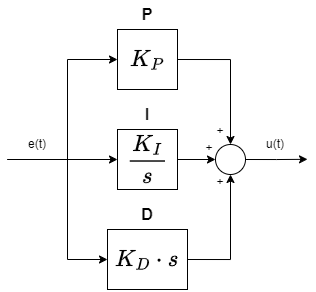</body></html>

La loi du correcteur PID est : $u(t) = K_P \cdot e(t) + K_I \cdot \int_{0}^{t} e(\tau) \,d\tau + K_D \cdot \frac{d}{dt}e(t)$.

La fonction de transfert du correcteur est donc : 

$$
C(s) = K_P + \frac{K_I}{s} + K_D \cdot s
$$

qui est aussi représentée en mettant le correcteur $K_P$ en évidence (appelée forme "**standard**" ou "idéale") :

$$
C(s) = K_P \cdot \left(1 + \frac{1}{T_i \cdot s} + T_d \cdot s\right) \quad \text{avec} \quad
\begin{cases}
    T_i = \frac{K_P}{K_I} \\
    T_d = \frac{K_D}{K_P}
\end{cases}
$$

<!DOCTYPE html><html><head><meta name="viewport" content="width=device-width, initial-scale=1"><style>img{display: block; margin-left: auto; margin-right: auto;}</style></head><body>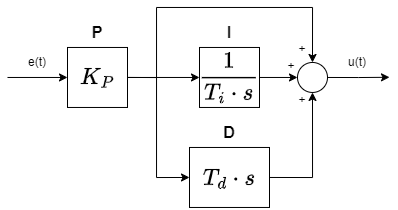</body></html>

La principale différence entre ces différentes formes concerne l’effet des coefficients de réglage sur le comportement du régulateur. Ainsi la forme parallèle permet de découpler complètement les actions proportionnelle, intégrale et dérivée entre elles. Alors que dans la forme standard, une modification sur la valeur du coefficient Kp va modifier simultanément les actions proportionnelle, intégrale et dérivée. À ce titre, certaines personnes, qui règlent des PID de manière manuelle, préfèrent la forme parallèle.

### Structure "série" d’un correcteur PID

Une autre configuration du régulateur PID consiste à mettre en série un correcteur PI avec un correcteur PD et porte de ce fait le nom de structure "**série**" :

<!DOCTYPE html><html><head><meta name="viewport" content="width=device-width, initial-scale=1"><style>img{display: block; margin-left: auto; margin-right: auto;}</style></head><body>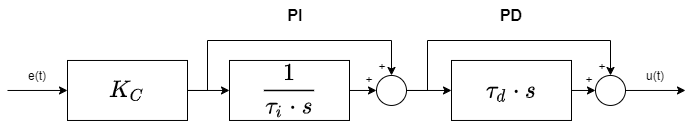</body></html>

La fonction de transfert de ce correcteur est donc : 

$$
C(s) = K_C \left(\frac{1}{\tau_i \cdot s}+1\right) (\tau_d \cdot s+1) = K_C \frac{\tau_i \cdot s + 1}{\tau_i \cdot s} (\tau_d \cdot s+1)
$$

>***Remarque :*** cette forme est mathématiquement équivalente aux deux premières. Ainsi un régulateur sous forme série pourra être mis sous forme parallèle à partir des équations de transformation suivante :
>- $K_P = K_C \cdot \left(1+\frac{\tau_d}{\tau_i}\right)$ ;
>- $\tau_i = \frac{K_C}{K_I}$ ;
>- $\tau_d = \frac{K_D}{K_C}$ ;

### Effet d'un régulateur PID sur les caractéristiques du système asservi

Observons l'effet qu'a un système régulé à l'aide d'un **correcteur PID** sur la réponse indicielle et fréquentielle de celui-ci. Pour ce faire, il suffit de faire tourner la cellule de code suivante afin de faire apparaître un curseur que vous pouvez utiliser pour modifier les valeurs de $K_P$, $K_I$ et $K_D$ et observer le comportement de la réponse indicielle et fréquentielle du système en fonction de ces derniers, et donc de $T_i$ et $T_d$.

> Exécutez la cellule de code sans vous soucier de son contenu.

In [6]:
# Generation of the transfer function
num = 1
den = [1, 1, 1]
H = ml.tf(num, den)

# Definition of the corrector
Kp = 10
Kd = 0
Ki = 0
C = Kp + ml.tf(Ki, [1, 0]) + ml.tf([Kd, 0], 1) # PID corrector
G_BO_init = C*H # Application of the corrector on the system
G_BF_init = ml.feedback(G_BO_init, 1)   # Servoing with a unitary feedback

# Creation of the interactive figures
step_fig, _, _ = rlf.step([G_BF_init, G_BF_init], plot=False, data=True, widget=True);
# nichols_fig = rlf.nichols2([G_BO_init, G_BO_init], plot=False);
# nyquist_fig = rlf.nyquist2([G_BO_init, G_BO_init], plot=False);
bode_fig = rlf.bode2([G_BO_init, G_BO_init], plot=False);

# Function called by the slider widgets
def plot_PID(Kp, Ki, Kd):
    # Print the Ti value
    if(Ki!=0):
        Ti = Kp/Ki
        print("Ti = {:.3f}s".format(Ti))
    else:
        print("Ti infini")

    # Print the Td value
    if(Kp!=0):
        Td = Kd/Kp
        print("Td = {:.3f}s".format(Td))
    else:
        print("Td infini")
    
    C = Kp + ml.tf(Ki, [1, 0]) + ml.tf([Kd, 0], 1) # PID corrector
    G_BO = C*H # Application of the corrector on the system
    G_BF = ml.feedback(G_BO)
    rlf.step([G_BF_init, G_BF], fig=step_fig, plot=False)
    # rlf.nichols2([G_BO_init, G_BO], fig=nichols_fig, plot=False)
    rlf.bode2([G_BO_init, G_BO], fig=bode_fig, plot=False)
    # rlf.nyquist2([G_BO_init, G_BO], fig=nyquist_fig, plot=False)

# Interactive slider widgets to adjust the parameters of the transfert function
slider_Kp = FloatSlider(min=0.0000001, max=20, step=1, value=10) # min !=0 to avoid raising warnings while being able to observe the behaviour of the system if Kp is close to 0
slider_Ki = FloatSlider(min=0, max=5, step=0.2, value=0)
slider_Kd = FloatSlider(min=0, max=5, step=0.2, value=0)
interact(plot_PID, Kp=slider_Kp, Ki=slider_Ki, Kd=slider_Kd);

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([step_fig, bode_fig]))
# display(HBox([nyquist_fig, nichols_fig])) # For information, as it is more difficult to interpret the impacts on physical behaviour from these

interactive(children=(FloatSlider(value=10.0, description='Kp', max=20.0, min=1e-07, step=1.0), FloatSlider(va…

    'data': [{'line': {'color': '#1F77B4'},
              'name': 'sys1',
      …

Quels sont les impacts du correcteur :
  - En régime statique ? : [Note tes observations ici]
  - En régime dynamique ? : [Note tes observations ici]
  - Sur la réponse fréquentielle ? : [Note tes observations ici]